In [88]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [89]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [90]:
df_domclick = pd.read_csv("domclick/Уфа_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2940 non-null   int64  
 1   region                         2940 non-null   object 
 2   address                        2940 non-null   object 
 3   latitude                       2940 non-null   float64
 4   longitude                      2940 non-null   float64
 5   price                          2940 non-null   int64  
 6   house_floors                   2940 non-null   int64  
 7   house_buildYear                2940 non-null   object 
 8   house_ceilingHeight            2940 non-null   object 
 9   house_hasGarbageDisposer       2135 non-null   object 
 10  house_liftsFreight             1706 non-null   float64
 11  house_liftsPassenger           1799 non-null   float64
 12  house_wallType                 2918 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1914142492,Уфа,"проспект Октября, 44/2",54.751315,56.002322,7800000,6,1993,2.6,False,0.0,0.0,Кирпичный,0,0,5148.2,1213,NaN,Центральное,1,Центральное,NaN,Не присвоен,6,NaN,Железобетонный,Ленточный,Центральное,80,0,Центральное,Приточно-вытяжная,Свободная продажа,3,64.7,7.7,39.1,5,0,1,1,True,Дизайнерский,NaN
1,1908642373,Уфа,"проспект Октября, 178/1",54.794482,56.039764,2000000,2,2023,3,NaN,NaN,NaN,Кирпичный,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,Свободная продажа,1,17.3,4.0,13.3,2,1,undefined,0,NaN,Улучшенная чистовая отделка,NaN
2,1908935782,Уфа,"Российская улица, 82",54.778269,56.035371,4199999,5,1961,2.6,NaN,NaN,NaN,Кирпичный,783.9,172.5,2354.5,42.1,NaN,Центральное,1,Центральное,NaN,C,3,NaN,Железобетонный,Ленточный,Центральное,NaN,0,Центральное,Приточно-вытяжная,Свободная продажа,2,42.9,6.0,29.2,4,1,undefined,1,True,Хорошее состояние,NaN
3,1910796430,Уфа,"улица Лётчиков, 20",54.795577,55.869497,6900000,14,2012,2.7,True,NaN,1.0,Кирпичный,1376.7,516.8,7273.6,689,2,Центральное,2,Центральное,4,Не присвоен,2,Пожарные гидранты,Железобетонный,Бетонные столбы,Центральное,NaN,0,Центральное,Вытяжная,Свободная продажа,2,62.6,11.6,33.9,3,undefined,1,0,NaN,Евроремонт,1.0
4,1912271400,Уфа,"улица Максима Рыльского, 24/2",54.763888,56.071520,6250000,9,1989,2.6,True,NaN,NaN,Панельный,2254.1,25.8,18832.4,3135,9,Центральное,2,Центральное,9,Не присвоен,9,NaN,Железобетонный,Бетонные столбы,Центральное,0,0,Центральное,Приточно-вытяжная,Свободная продажа,2,61.2,8.0,29.8,2,undefined,1,0,True,Евроремонт,2.0


In [91]:
df_cian = pd.read_csv("cian/data_home_Ufa.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11329 entries, 0 to 11328
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 11329 non-null  object 
 1   price                11329 non-null  int64  
 2   price_for_metr       11329 non-null  int64  
 3   floor_object         11329 non-null  int64  
 4   total_floors         11329 non-null  int64  
 5   type_of_home         11329 non-null  object 
 6   square_home          11329 non-null  float64
 7   live_square          11329 non-null  object 
 8   kitchen_square       11329 non-null  object 
 9   height_ceiling       11329 non-null  object 
 10  bathroom             11329 non-null  object 
 11  balcony              11329 non-null  object 
 12  repair               11329 non-null  object 
 13  yer_home             11329 non-null  object 
 14  garbage_chute        11329 non-null  object 
 15  type_home            11329 non-null 

In [92]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,1-комн. квартира,1150000,92000,3,5,Вторичка,12.5,Null,Null,2.7,1,Null,Косметический,1976,Null,Кирпичный,Железобетонные,2,Центральное,Нет,Центральное,Null,Null,"Башкортостан респ., Уфа, р-н Орджоникидзевский...",https://ufa.cian.ru/sale/flat/292126405/
1,Студия,1250000,16892,2,4,Вторичка,74.0,Null,6.7,3.0,Null,Null,Null,1951,Null,Кирпичный,Железобетонные,3,Центральное,Нет,Центральное,Null,Null,"Башкортостан респ., Уфа, р-н Орджоникидзевский...",https://ufa.cian.ru/sale/flat/292250255/
2,1-комн. квартира,1280000,32821,1,2,Вторичка,39.0,25.0,5.0,2.5,Null,Null,Косметический,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,"Башкортостан респ., Уфа, р-н Ленинский, мкр. Ц...",https://ufa.cian.ru/sale/flat/285373603/
3,Студия,1185000,91154,5,9,Вторичка,13.0,Null,Null,Null,1,Null,Косметический,1972,Null,Кирпичный,Железобетонные,2,Центральное,Нет,Null,Null,1,"Башкортостан респ., Уфа, р-н Октябрьский, мкр....",https://ufa.cian.ru/sale/flat/289037312/
4,1-комн. квартира,1200000,33333,1,2,Вторичка,36.0,17.0,12.0,Null,Null,Null,Косметический,Null,Null,Блочный,Null,Null,Null,Null,Null,Null,Null,"Башкортостан респ., Уфа, р-н Калининский, Бази...",https://ufa.cian.ru/sale/flat/264844601/


# Подготовка данных

In [93]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [94]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2940 non-null   int64  
 1   region                         2940 non-null   object 
 2   address                        2940 non-null   object 
 3   latitude                       2940 non-null   float64
 4   longitude                      2940 non-null   float64
 5   price                          2940 non-null   int64  
 6   house_floors                   2940 non-null   int64  
 7   house_buildYear                2906 non-null   object 
 8   house_ceilingHeight            1689 non-null   object 
 9   house_hasGarbageDisposer       2135 non-null   object 
 10  house_liftsFreight             1706 non-null   float64
 11  house_liftsPassenger           1799 non-null   float64
 12  house_wallType                 2903 non-null   o

In [95]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6293 entries, 0 to 11328
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 6293 non-null   object 
 1   price                6293 non-null   int64  
 2   price_for_metr       6293 non-null   int64  
 3   floor_object         6293 non-null   int64  
 4   total_floors         6293 non-null   int64  
 5   type_of_home         6293 non-null   object 
 6   square_home          6293 non-null   float64
 7   live_square          4556 non-null   object 
 8   kitchen_square       5128 non-null   object 
 9   height_ceiling       3943 non-null   object 
 10  bathroom             3507 non-null   object 
 11  balcony              3044 non-null   object 
 12  repair               4473 non-null   object 
 13  yer_home             4439 non-null   object 
 14  garbage_chute        854 non-null    object 
 15  type_home            5159 non-null   objec

In [96]:
df_cian['name'].unique()

array(['1-комн. квартира', 'Студия', '1/3 квартиры', '2-комн. квартира',
       '1/2 квартиры', 'Апартаменты-студия', '3-комн. квартира',
       'Квартира свободной планировки', '1-комн. апартаменты',
       '4-комн. квартира', '2-комн. апартаменты', '5-комн. квартира',
       '3-комн. апартаменты', 'Многокомнатная квартира',
       '5-комн. апартаменты', '4-комн. апартаменты'], dtype=object)

In [97]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [98]:
df_cian['name'].unique()

array(['1-комн. квартира', 'Студия', '2-комн. квартира',
       'Апартаменты-студия', '3-комн. квартира', '1-комн. апартаменты',
       '4-комн. квартира', '2-комн. апартаменты', '5-комн. квартира',
       '3-комн. апартаменты', '5-комн. апартаменты',
       '4-комн. апартаменты'], dtype=object)

In [99]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['1', '0', '2', '3', '4', '5'], dtype=object)

In [100]:
df_domclick['objectInfo_renovation'].unique()

array(['Дизайнерский', 'Улучшенная чистовая отделка', 'Хорошее состояние',
       'Евроремонт', 'Требуется ремонт', 'евроремонт', 'косметический',
       'Получистовая отделка', nan, 'Требует ремонта', 'Без ремонта',
       'Косметический', 'Евро', 'Чистовая отделка', 'Отличное состояние',
       '0', 'cosmetic', 'Отсутствует', 'Улучшенная черновая отделка',
       'Косметический ремонт', 'no', 'Ремонт', 'Обычное состояние',
       'Ремонт не требуется', 'Дизайнерский ремонт', 'euro',
       'Под чистовой ремонт', 'Предчистовая отделка',
       'Требуется косметический ремонт', 'Требуется ', 'design',
       'Ремонт от застройщика', 'Хороший'], dtype=object)

In [101]:
df_cian['repair'].unique()

array(['Косметический', nan, 'Евроремонт', 'Без ремонта', 'Дизайнерский'],
      dtype=object)

In [102]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('cosmetic', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отличное состояние', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('design', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('euro', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Улучшенная черновая отделка', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('черновая', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Получистовая отделка', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отделка на выбор', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отделка White box', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отделка на выбор ', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Улучшенная чистовая отделка', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('обычное', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Обычное состояние', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хорошее состояние', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт не требуется', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [103]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [104]:
df_cian['repair'].unique()

array(['1', nan, '2', '0', '3'], dtype=object)

In [105]:
df_domclick['objectInfo_renovation'].unique()

array(['3', '6', '9', '2', '5', '1', '4', nan, '0', '8'], dtype=object)

In [106]:
df_domclick['house_wallType'].unique()

array(['Кирпичный', 'Панельный', 'Железобетон', 'Монолитно-кирпичный',
       'Смешанные', 'Блочный', 'Монолитный', 'Деревянный', nan, 'Иные',
       'Кирпично-монолитный'], dtype=object)

In [107]:
df_cian['type_home'].unique()

array(['Кирпичный', nan, 'Блочный', 'Панельный', 'Деревянный',
       'Монолитно-кирпичный', 'Монолитный', 'Газобетонный блок'],
      dtype=object)

In [108]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [109]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон (блоки)', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-каркасный', '12')

In [110]:
df_domclick['house_wallType'].unique()

array(['1', '0', '7', '4', '9', '2', '3', '5', nan], dtype=object)

In [111]:
df_cian['type_home'].unique()

array(['1', nan, '2', '0', '5', '4', '3', '10'], dtype=object)

In [112]:
df_cian['type_of_overlap'].unique()

array(['Железобетонные', nan, 'Смешанные', 'Деревянные'], dtype=object)

In [113]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', nan, 'Монолитный', 'Смешанный', 'Деревянный',
       'Иное', 'Бетонный'], dtype=object)

In [114]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [115]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Блочный', '5')

In [116]:
df_cian['type_of_overlap'].unique()

array(['0', nan, '1', '2'], dtype=object)

In [117]:
df_domclick['house_floorType'].unique()

array(['0', nan, '3', '1', '2', '4'], dtype=object)

In [118]:
df_cian['heating'].unique()

array(['Центральное', nan, 'Котел/Квартирное отопление',
       'Индивидуальный тепловой пункт', 'Автономная котельная', 'Печь',
       'Нет'], dtype=object)

In [119]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan, 'Индивидуальный тепловой пункт (ИТП)',
       'Автономная котельная (крышная встроенно-пристроенная)',
       'Квартирное отопление (квартирный котел)', 'Котёл', 'Печное'],
      dtype=object)

In [120]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [121]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котёл', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Печное', '4')
df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Электроотопление', '5')
df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [122]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

In [123]:
df_cian['heating'].unique()

array(['0', nan, '1', '3', '2', '4'], dtype=object)

In [124]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [125]:
df_domclick['objectInfo_hasGas'].unique()

array([True, nan, False], dtype=object)

In [126]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [127]:
df_cian['gas_supply'].unique()

array([ True, False])

<Axes: xlabel='accident_rate', ylabel='count'>

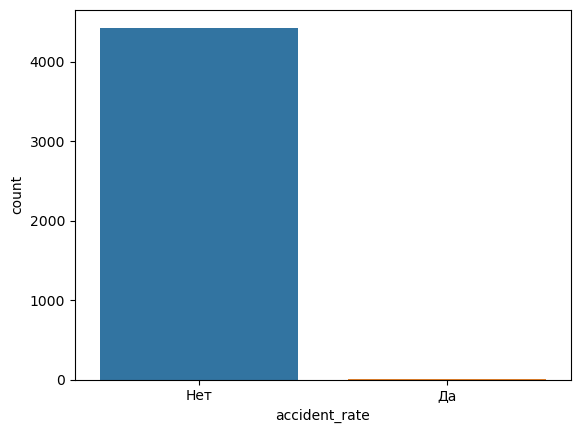

In [128]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

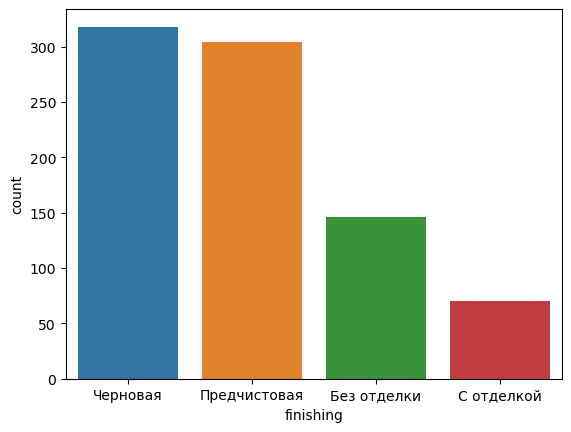

In [129]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

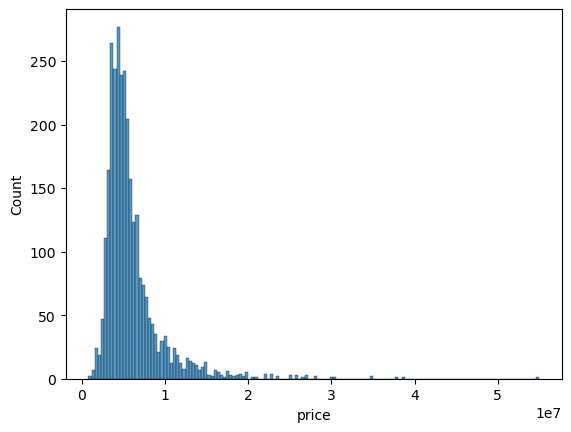

In [130]:
sns.histplot(data = df_domclick, x = 'price')

In [131]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

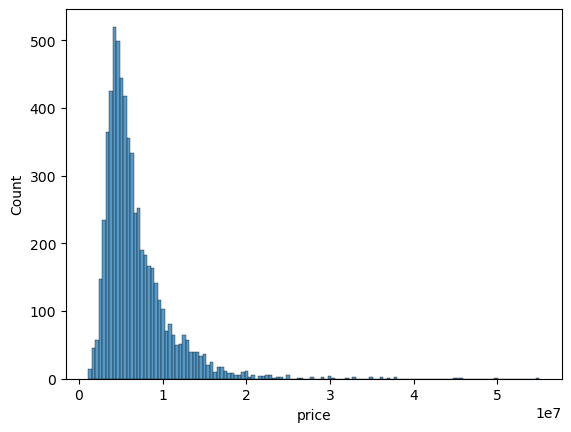

In [132]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

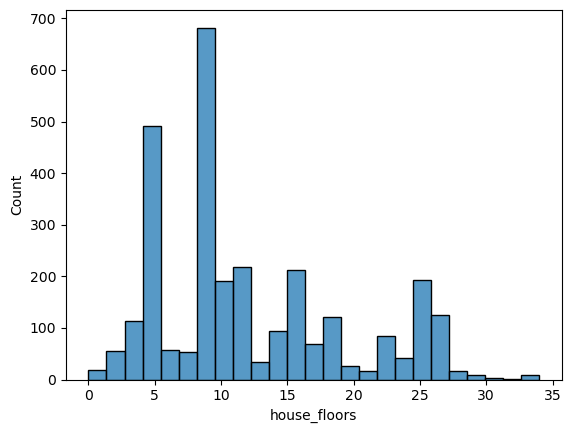

In [133]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

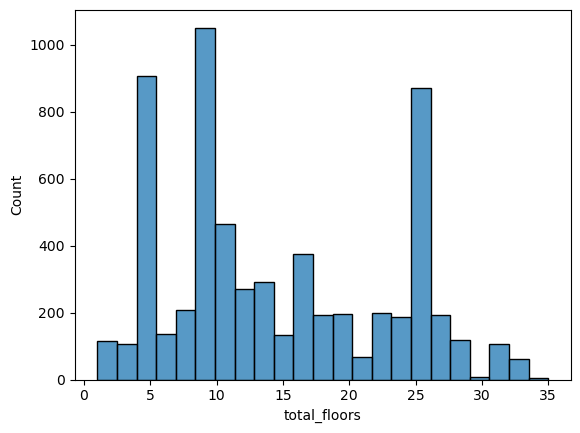

In [134]:
sns.histplot(data = df_cian, x = 'total_floors')

In [135]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

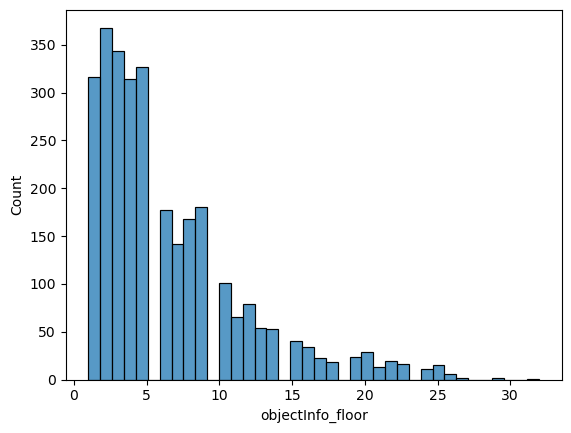

In [136]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

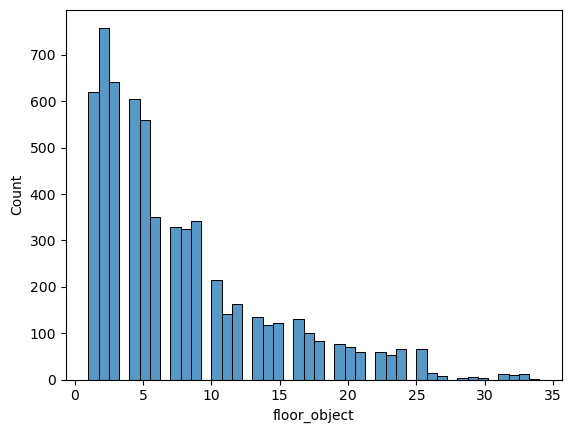

In [137]:
sns.histplot(data = df_cian, x = 'floor_object')

In [138]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_area', ylabel='Count'>

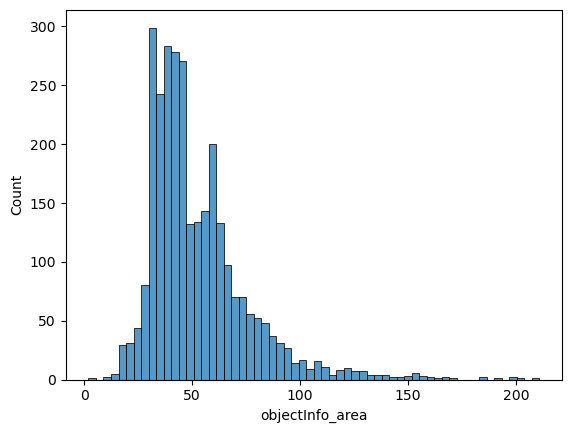

In [139]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

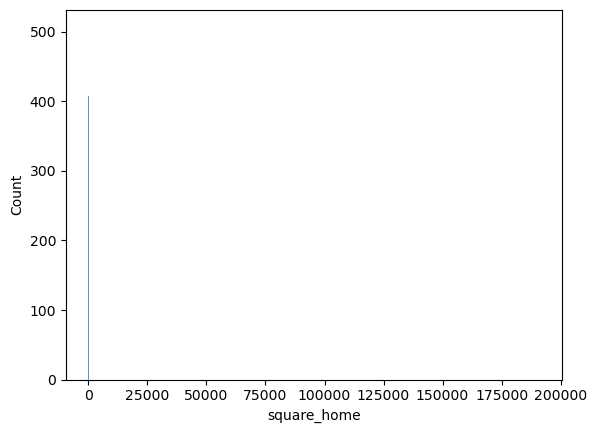

In [140]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

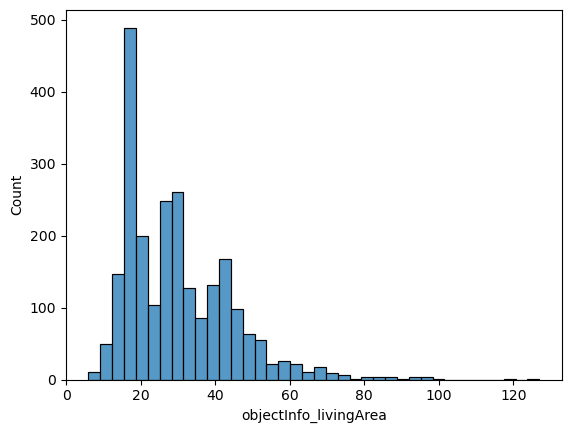

In [141]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

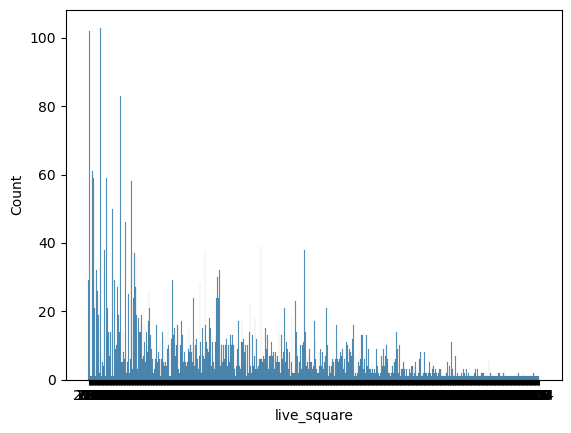

In [142]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

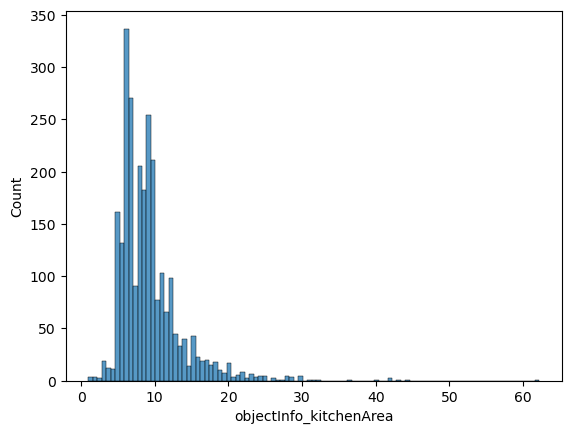

In [143]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

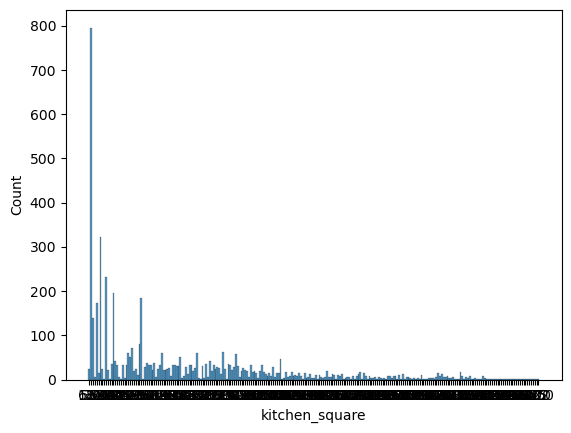

In [144]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

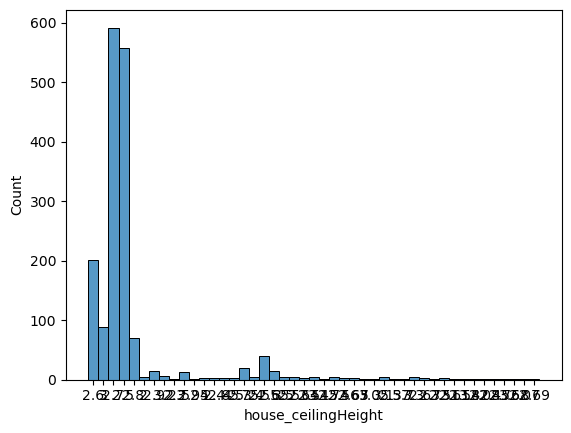

In [145]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

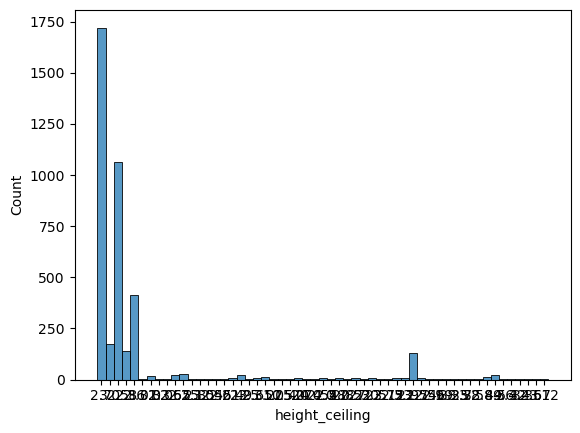

In [146]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

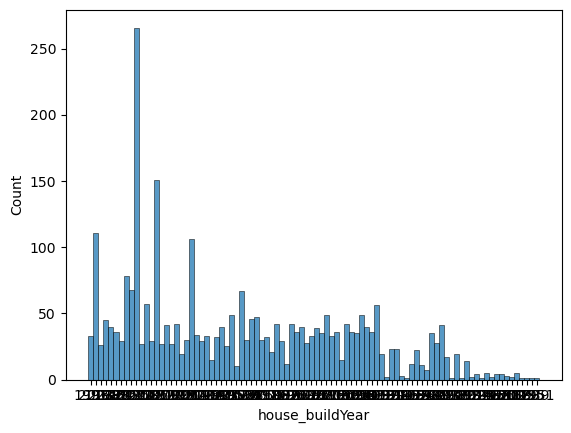

In [147]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

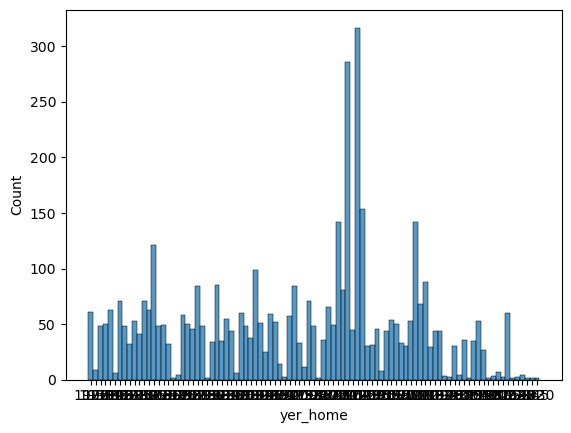

In [148]:
sns.histplot(data = df_cian, x = 'yer_home')

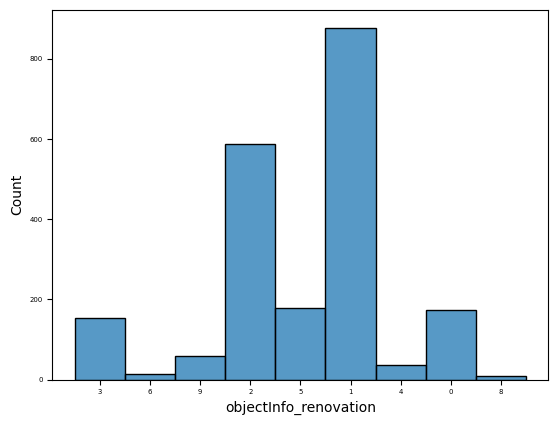

In [149]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [150]:
df_domclick['objectInfo_renovation'].unique()

array(['3', '6', '9', '2', '5', '1', '4', nan, '0', '8'], dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

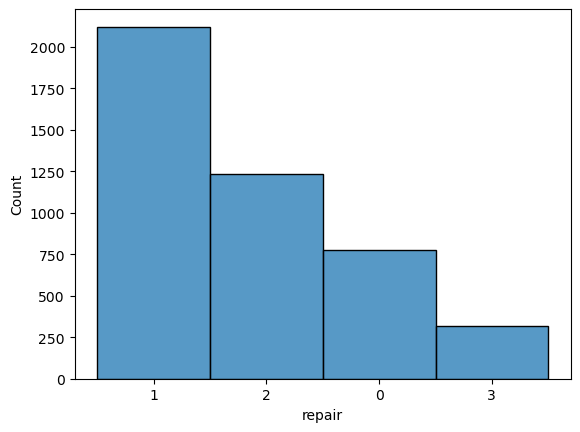

In [151]:
sns.histplot(data = df_cian, x = 'repair')

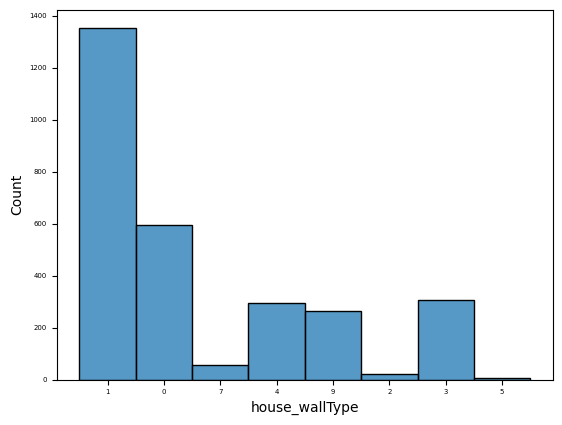

In [152]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [153]:
df_domclick['house_wallType'].unique()

array(['1', '0', '7', '4', '9', '2', '3', '5', nan], dtype=object)

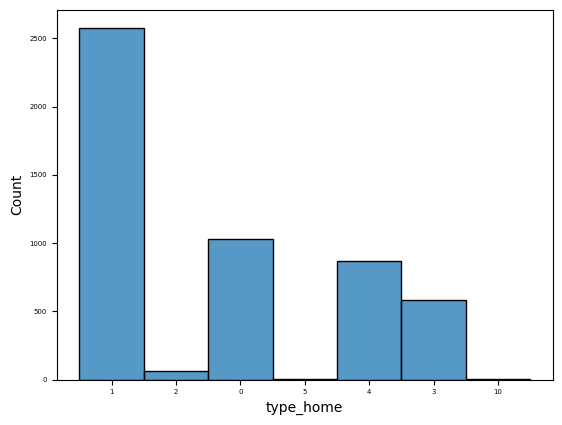

In [154]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [155]:
df_cian['type_home'].unique()

array(['1', nan, '2', '0', '5', '4', '3', '10'], dtype=object)

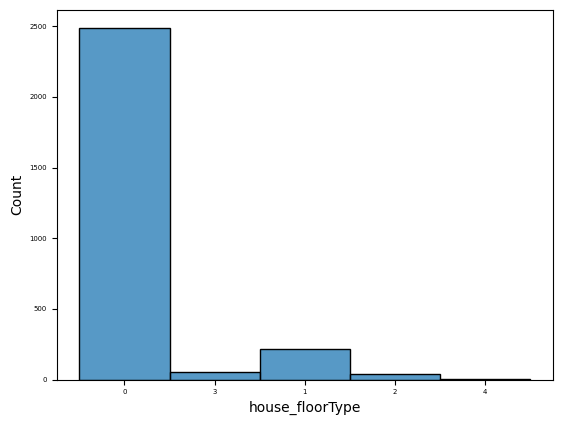

In [156]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [157]:
df_domclick['house_floorType'].unique()

array(['0', nan, '3', '1', '2', '4'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

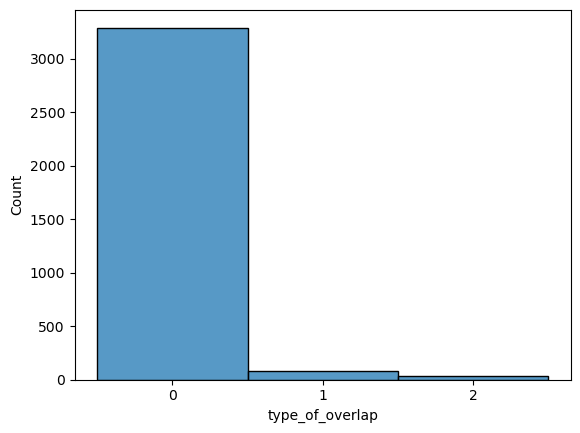

In [158]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

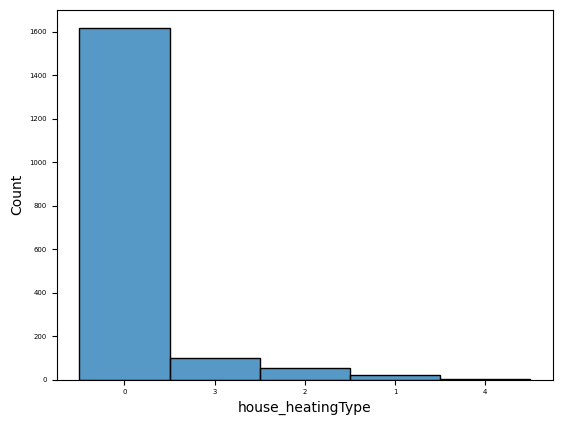

In [159]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [160]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

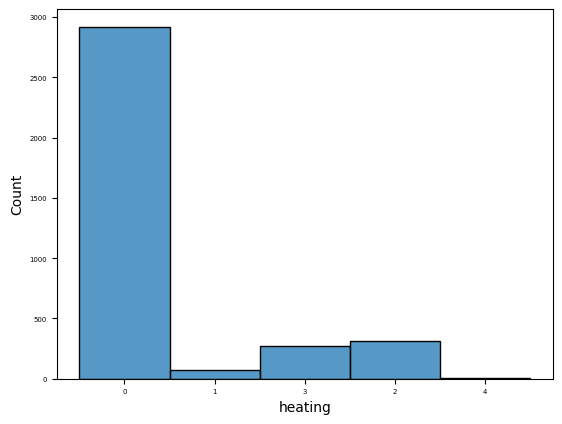

In [161]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [162]:
df_cian['heating'].unique()

array(['0', nan, '1', '3', '2', '4'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

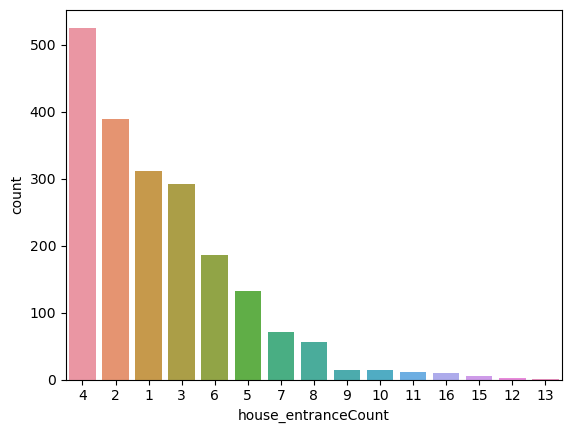

In [163]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

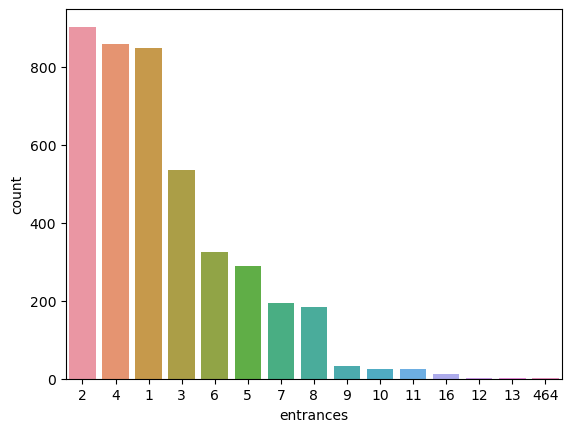

In [164]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

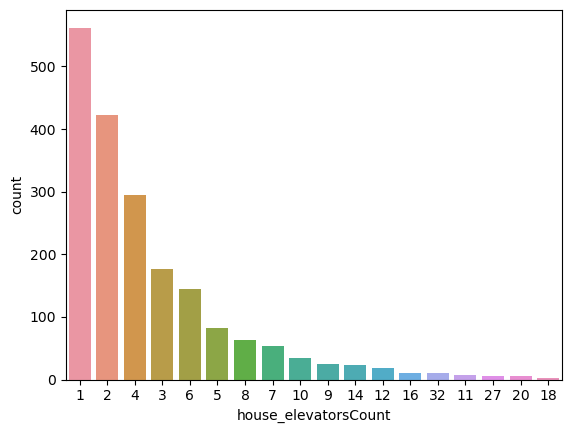

In [165]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

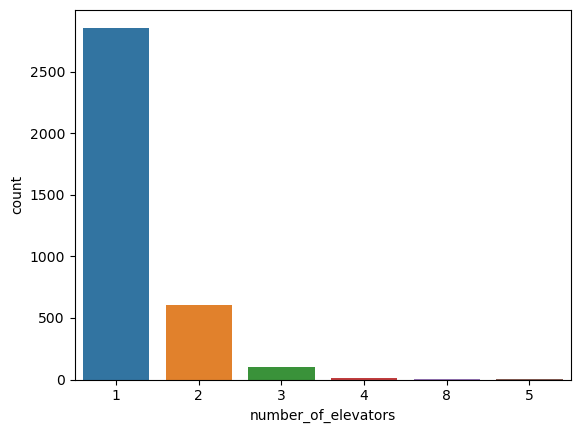

In [166]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [167]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2940 non-null   float64
 1   longitude                      2940 non-null   float64
 2   price                          2940 non-null   int64  
 3   house_floors                   2940 non-null   int64  
 4   house_buildYear                2906 non-null   object 
 5   house_ceilingHeight            1689 non-null   object 
 6   house_hasGarbageDisposer       2135 non-null   object 
 7   house_liftsFreight             1706 non-null   float64
 8   house_liftsPassenger           1799 non-null   float64
 9   house_wallType                 2900 non-null   object 
 10  house_areaNonResidential       1961 non-null   object 
 11  house_basementArea             1815 non-null   object 
 12  house_chuteCount               1083 non-null   o

In [168]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2940 non-null   float64
 1   longitude                      2940 non-null   float64
 2   price                          2940 non-null   int64  
 3   house_floors                   2940 non-null   int64  
 4   house_buildYear                2906 non-null   object 
 5   house_ceilingHeight            1689 non-null   object 
 6   house_hasGarbageDisposer       2135 non-null   float64
 7   house_liftsFreight             1706 non-null   float64
 8   house_liftsPassenger           1799 non-null   float64
 9   house_wallType                 2900 non-null   object 
 10  house_areaNonResidential       1961 non-null   object 
 11  house_basementArea             1815 non-null   object 
 12  house_chuteCount               1083 non-null   o

In [169]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [170]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2940 non-null   float64
 1   longitude                      2940 non-null   float64
 2   price                          2940 non-null   int64  
 3   house_floors                   2940 non-null   int64  
 4   house_buildYear                2906 non-null   float64
 5   house_ceilingHeight            1689 non-null   float64
 6   house_hasGarbageDisposer       2135 non-null   float64
 7   house_liftsFreight             1706 non-null   float64
 8   house_liftsPassenger           1799 non-null   float64
 9   house_wallType                 2900 non-null   float64
 10  house_areaNonResidential       1961 non-null   float64
 11  house_basementArea             1815 non-null   float64
 12  house_chuteCount               1083 non-null   f

In [171]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 11328
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6264 non-null   int64  
 1   price_for_metr       6264 non-null   int64  
 2   floor_object         6264 non-null   int64  
 3   total_floors         6264 non-null   int64  
 4   type_of_home         6264 non-null   object 
 5   square_home          6264 non-null   float64
 6   live_square          4535 non-null   object 
 7   kitchen_square       5105 non-null   object 
 8   height_ceiling       3922 non-null   object 
 9   bathroom             3485 non-null   object 
 10  balcony              3026 non-null   object 
 11  repair               4447 non-null   object 
 12  yer_home             4412 non-null   object 
 13  garbage_chute        843 non-null    object 
 14  type_home            5135 non-null   object 
 15  type_of_overlap      3397 non-null   objec

In [172]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 11328
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6264 non-null   int64  
 1   price_for_metr       6264 non-null   int64  
 2   floor_object         6264 non-null   int64  
 3   total_floors         6264 non-null   int64  
 4   type_of_home         6264 non-null   float64
 5   square_home          6264 non-null   float64
 6   live_square          4535 non-null   object 
 7   kitchen_square       5105 non-null   object 
 8   height_ceiling       3922 non-null   object 
 9   bathroom             3485 non-null   object 
 10  balcony              3026 non-null   object 
 11  repair               4447 non-null   object 
 12  yer_home             4412 non-null   object 
 13  garbage_chute        843 non-null    float64
 14  type_home            5135 non-null   object 
 15  type_of_overlap      3397 non-null   objec

In [173]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [174]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 11328
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6264 non-null   int64  
 1   price_for_metr       6264 non-null   int64  
 2   floor_object         6264 non-null   int64  
 3   total_floors         6264 non-null   int64  
 4   type_of_home         6264 non-null   float64
 5   square_home          6264 non-null   float64
 6   live_square          4535 non-null   float64
 7   kitchen_square       5105 non-null   float64
 8   height_ceiling       3922 non-null   float64
 9   bathroom             3485 non-null   float64
 10  balcony              3026 non-null   float64
 11  repair               4447 non-null   float64
 12  yer_home             4412 non-null   float64
 13  garbage_chute        843 non-null    float64
 14  type_home            5135 non-null   float64
 15  type_of_overlap      3397 non-null   float

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1150000,92000,3,5,0.0,12.5,NaN,NaN,2.7,1.0,NaN,1.0,1976.0,NaN,1.0,0.0,2.0,0.0,1.0,NaN,NaN,1
1,1250000,16892,2,4,0.0,74.0,NaN,6.7,3.0,NaN,NaN,NaN,1951.0,NaN,1.0,0.0,3.0,0.0,1.0,NaN,NaN,0
2,1280000,32821,1,2,0.0,39.0,25.0,5.0,2.5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1
3,1185000,91154,5,9,0.0,13.0,NaN,NaN,NaN,1.0,NaN,1.0,1972.0,NaN,1.0,0.0,2.0,0.0,0.0,NaN,1.0,0
4,1200000,33333,1,2,0.0,36.0,17.0,12.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,NaN,1


In [175]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2940 non-null   float64
 1   longitude                      2940 non-null   float64
 2   price                          2940 non-null   int64  
 3   house_floors                   2940 non-null   int64  
 4   house_buildYear                2906 non-null   float64
 5   house_ceilingHeight            1689 non-null   float64
 6   house_hasGarbageDisposer       2135 non-null   float64
 7   house_liftsFreight             1706 non-null   float64
 8   house_liftsPassenger           1799 non-null   float64
 9   house_wallType                 2900 non-null   float64
 10  house_areaNonResidential       1961 non-null   float64
 11  house_basementArea             1815 non-null   float64
 12  house_chuteCount               1083 non-null   f

# Соединение датасетов

In [176]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [177]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [178]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array(['1', nan, '0', '2'], dtype=object)

In [179]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

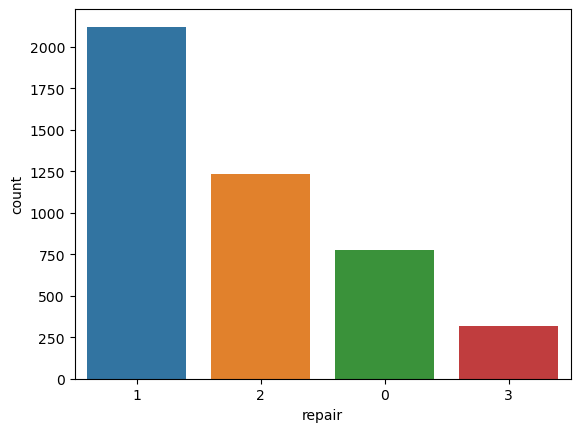

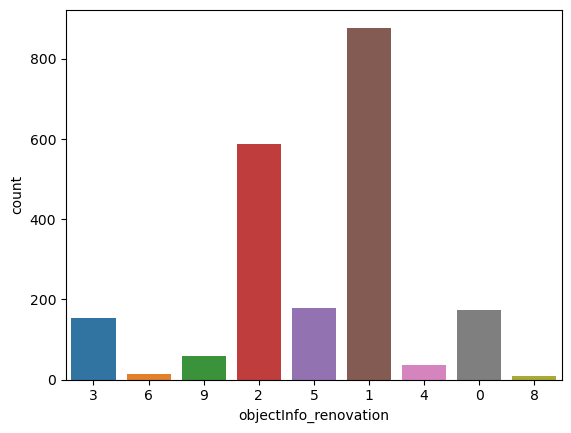

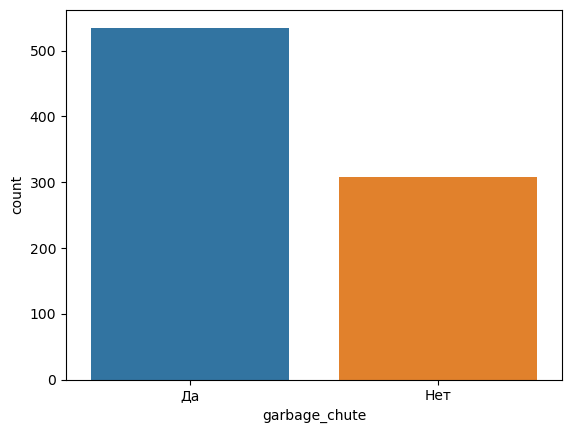

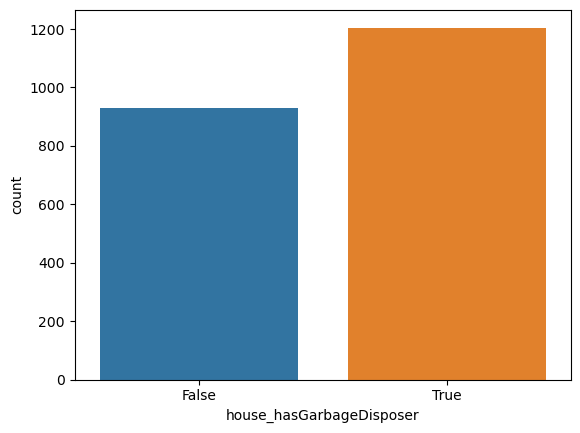

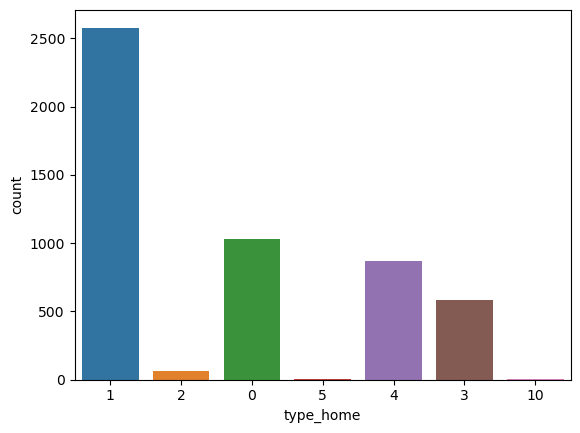

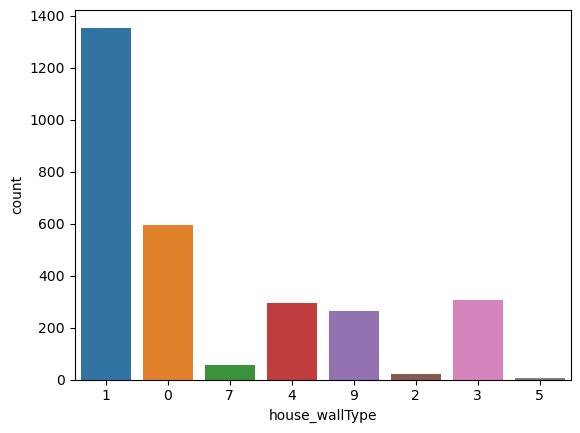

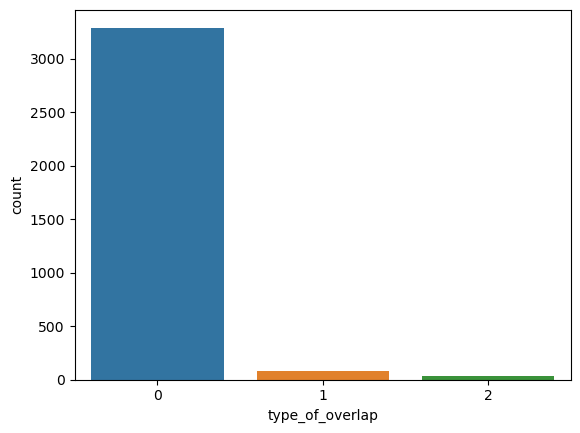

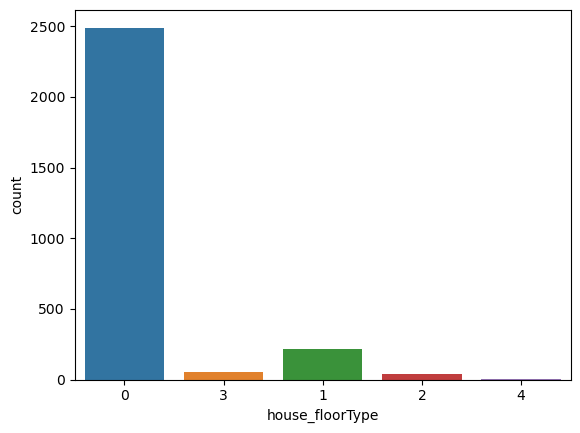

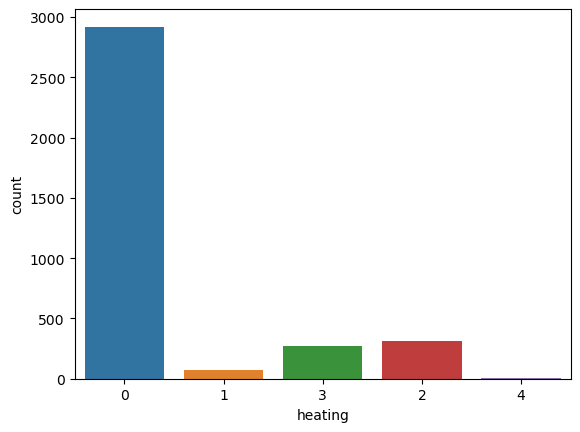

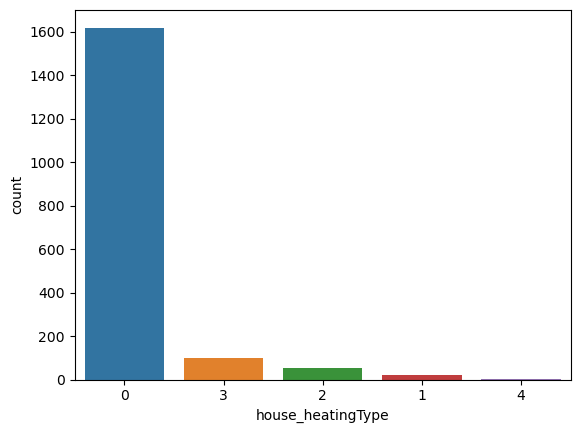

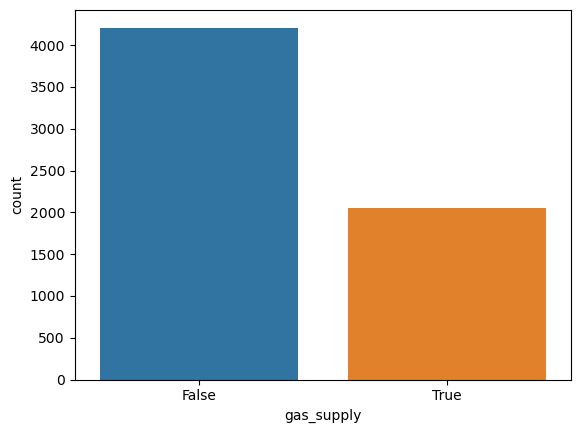

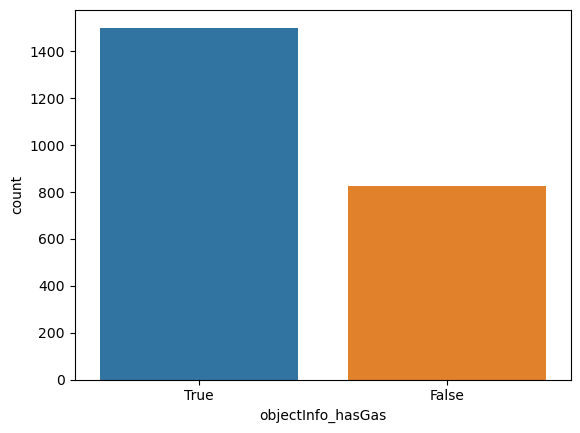

<Figure size 640x480 with 0 Axes>

In [180]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [181]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [182]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [183]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2940 non-null   int64  
 1   room_count       2940 non-null   int64  
 2   floor            2940 non-null   int64  
 3   totalFloors      2940 non-null   int64  
 4   area             2940 non-null   float64
 5   kitchenArea      2602 non-null   float64
 6   livingArea       2370 non-null   float64
 7   ceilingHeight    1689 non-null   float64
 8   bathroomCount    1356 non-null   float64
 9   balconyCount     2940 non-null   int64  
 10  repairType       2090 non-null   float64
 11  buildYear        2906 non-null   float64
 12  hasGarbageChute  2135 non-null   float64
 13  wallType         2900 non-null   float64
 14  floorType        2806 non-null   float64
 15  entranceCount    2026 non-null   float64
 16  heatingType      1794 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,7800000,3,5,6,64.7,7.7,39.1,2.6,1.0,1,3.0,1993.0,0.0,1.0,0.0,6.0,0.0,1.0,NaN
1,2000000,1,2,2,17.3,4.0,13.3,3.0,NaN,0,6.0,2023.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,4199999,2,4,5,42.9,6.0,29.2,2.6,NaN,1,9.0,1961.0,NaN,1.0,0.0,3.0,0.0,1.0,NaN
3,6900000,2,3,14,62.6,11.6,33.9,2.7,1.0,0,2.0,2012.0,1.0,1.0,0.0,2.0,0.0,NaN,4.0
4,6250000,2,2,9,61.2,8.0,29.8,2.6,1.0,0,2.0,1989.0,1.0,0.0,0.0,9.0,0.0,1.0,9.0


In [184]:
merge_domclick['repairType'].unique()

array([ 3.,  6.,  9.,  2.,  5.,  1.,  4., nan,  0.,  8.])

In [185]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            6264 non-null   int64  
 1   room_count       6264 non-null   int64  
 2   floor            6264 non-null   int64  
 3   totalFloors      6264 non-null   int64  
 4   area             6264 non-null   float64
 5   kitchenArea      5105 non-null   float64
 6   livingArea       4535 non-null   float64
 7   ceilingHeight    3922 non-null   float64
 8   bathroomCount    3485 non-null   float64
 9   balconyCount     3026 non-null   float64
 10  repairType       4447 non-null   float64
 11  buildYear        4412 non-null   float64
 12  hasGarbageChute  843 non-null    float64
 13  wallType         5135 non-null   float64
 14  floorType        3397 non-null   float64
 15  entranceCount    4239 non-null   float64
 16  heatingType      3573 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1150000,1,3,5,12.5,NaN,NaN,2.7,1.0,NaN,1.0,1976.0,NaN,1.0,0.0,2.0,0.0,1.0,NaN
1,1250000,0,2,4,74.0,6.7,NaN,3.0,NaN,NaN,NaN,1951.0,NaN,1.0,0.0,3.0,0.0,1.0,NaN
2,1280000,1,1,2,39.0,5.0,25.0,2.5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,1185000,0,5,9,13.0,NaN,NaN,NaN,1.0,NaN,1.0,1972.0,NaN,1.0,0.0,2.0,0.0,0.0,1.0
4,1200000,1,1,2,36.0,12.0,17.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN


In [186]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [187]:
df_combined = df_combined.drop_duplicates()

In [188]:
df_combined.reset_index(drop = True, inplace=True)

In [189]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9179 non-null   int64  
 1   room_count       9179 non-null   int64  
 2   floor            9179 non-null   int64  
 3   totalFloors      9179 non-null   int64  
 4   area             9179 non-null   float64
 5   kitchenArea      7698 non-null   float64
 6   livingArea       6882 non-null   float64
 7   ceilingHeight    5591 non-null   float64
 8   bathroomCount    4833 non-null   float64
 9   balconyCount     5961 non-null   float64
 10  repairType       6531 non-null   float64
 11  buildYear        7312 non-null   float64
 12  hasGarbageChute  2977 non-null   float64
 13  wallType         8012 non-null   float64
 14  floorType        6198 non-null   float64
 15  entranceCount    6259 non-null   float64
 16  heatingType      5362 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,7800000,3,5,6,64.7,7.7,39.1,2.6,1.0,1.0,3.0,1993.0,0.0,1.0,0.0,6.0,0.0,1.0,NaN
1,2000000,1,2,2,17.3,4.0,13.3,3.0,NaN,0.0,6.0,2023.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,4199999,2,4,5,42.9,6.0,29.2,2.6,NaN,1.0,9.0,1961.0,NaN,1.0,0.0,3.0,0.0,1.0,NaN
3,6900000,2,3,14,62.6,11.6,33.9,2.7,1.0,0.0,2.0,2012.0,1.0,1.0,0.0,2.0,0.0,NaN,4.0
4,6250000,2,2,9,61.2,8.0,29.8,2.6,1.0,0.0,2.0,1989.0,1.0,0.0,0.0,9.0,0.0,1.0,9.0


<Axes: xlabel='price', ylabel='Count'>

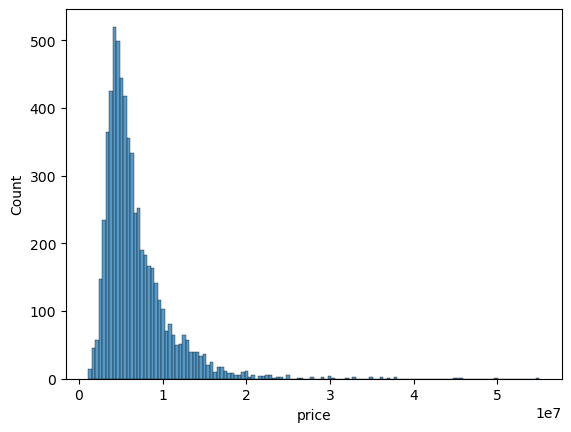

In [190]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

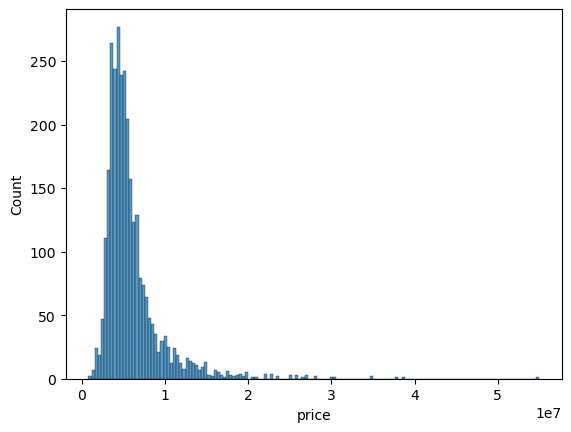

In [191]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

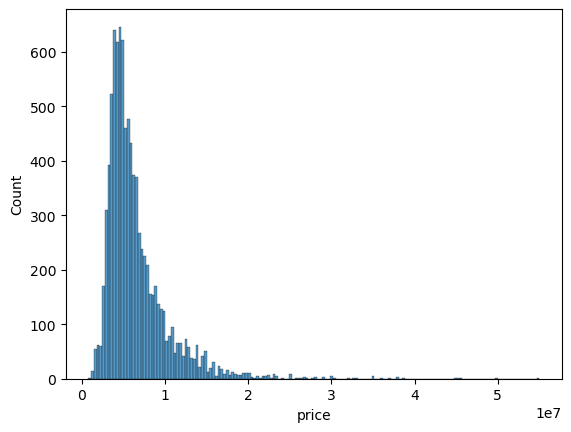

In [192]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

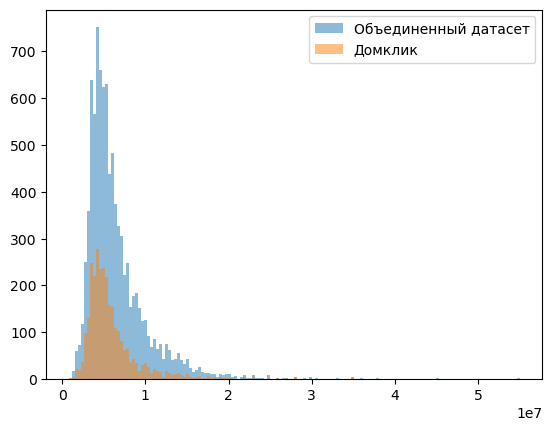

In [193]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

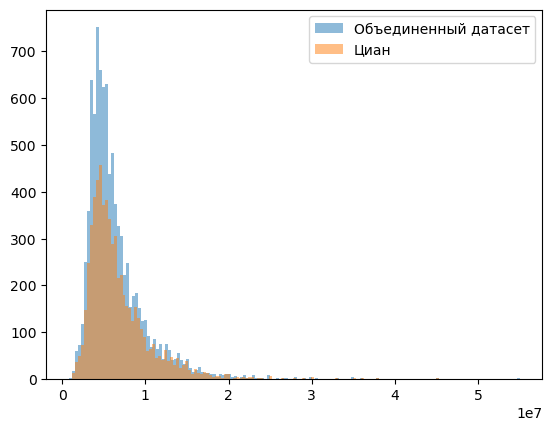

In [194]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

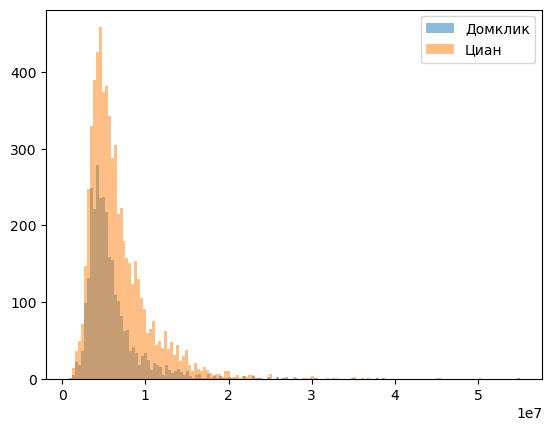

In [195]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [196]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [197]:
df_domclick_prepared['price'].describe()

count       2940.00000
mean     5998749.72857
std      3657492.00286
min       810000.00000
25%      3999000.00000
50%      5000000.00000
75%      6699000.00000
max     55000000.00000
Name: price, dtype: float64

In [198]:
df_cian_prepared['price'].describe()

count       6264.00000
mean     6771009.12915
std      4013798.31097
min      1150000.00000
25%      4270000.00000
50%      5691397.50000
75%      8096957.00000
max     55000000.00000
Name: price, dtype: float64

In [199]:
df_combined['price'].describe()

count       9179.00000
mean     6522927.87090
std      3921992.81608
min       810000.00000
25%      4150000.00000
50%      5450000.00000
75%      7620235.00000
max     55000000.00000
Name: price, dtype: float64

In [200]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [201]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_11488\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


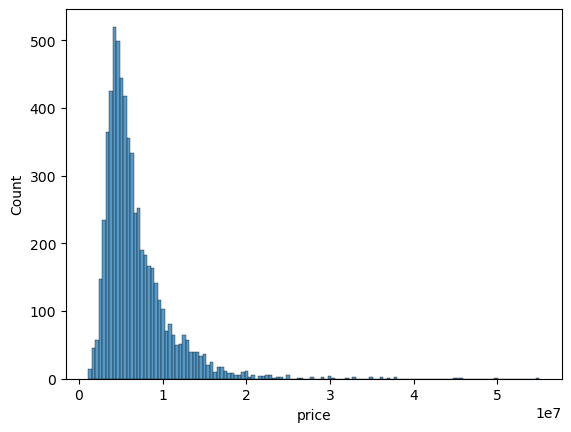

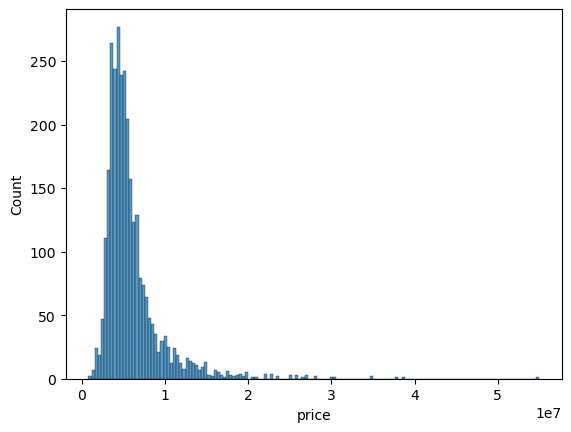

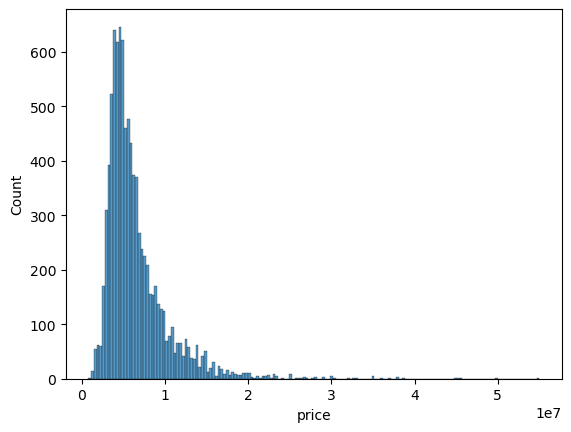

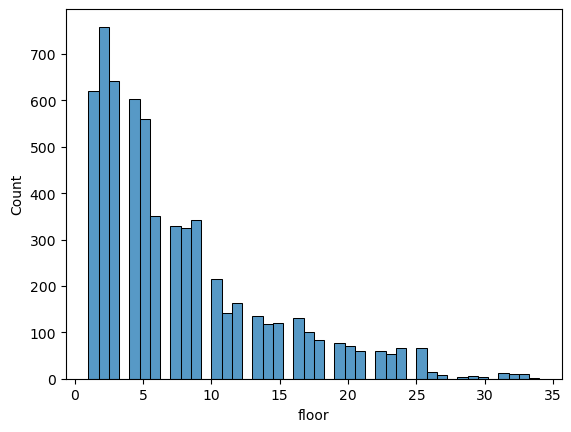

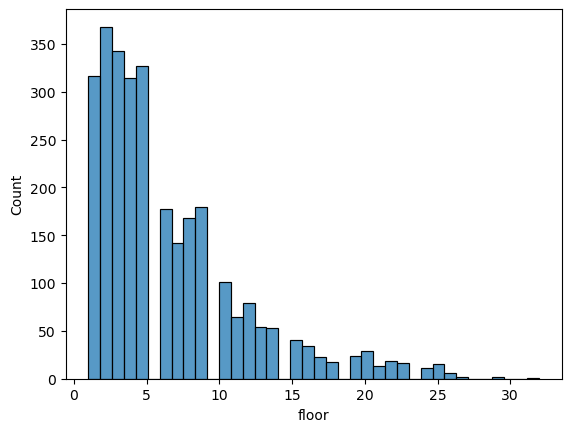

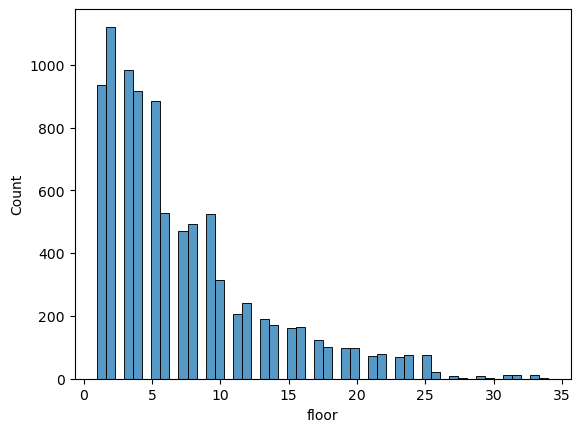

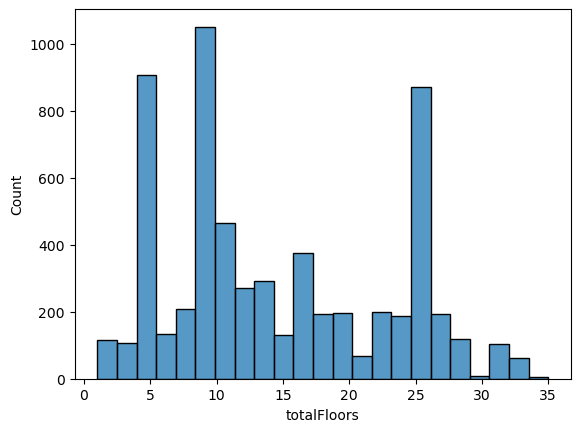

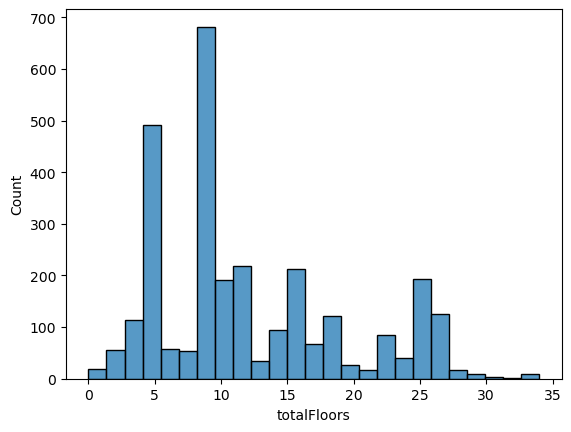

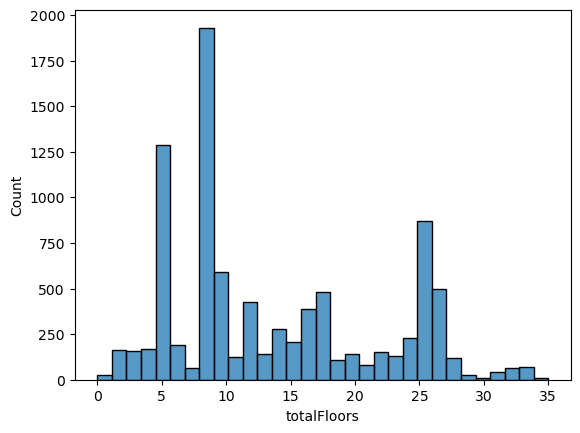

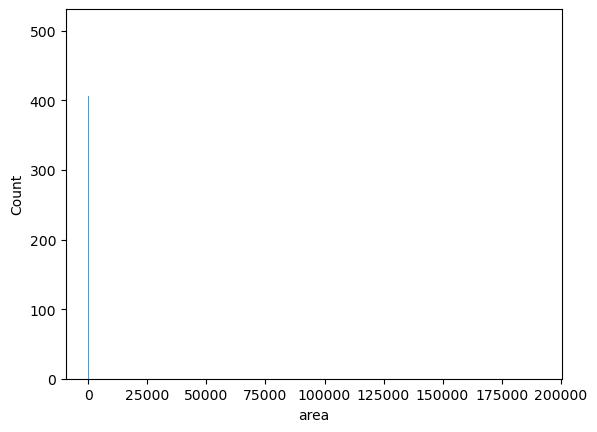

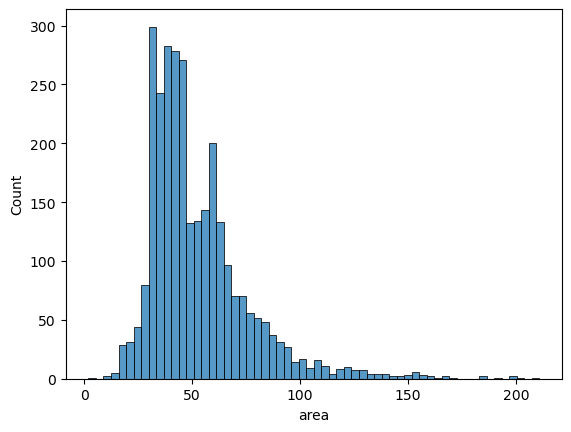

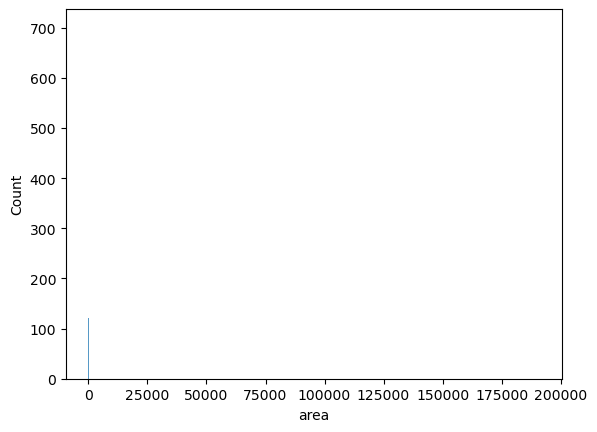

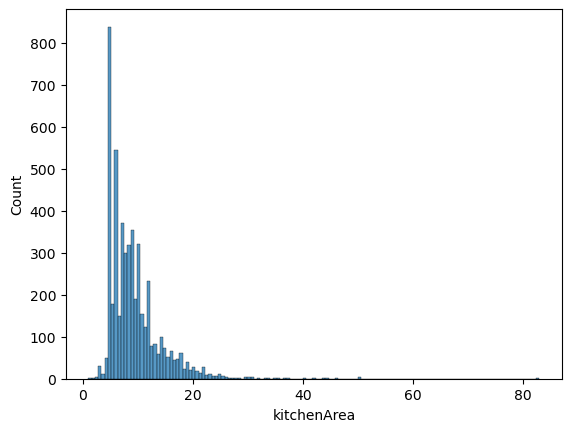

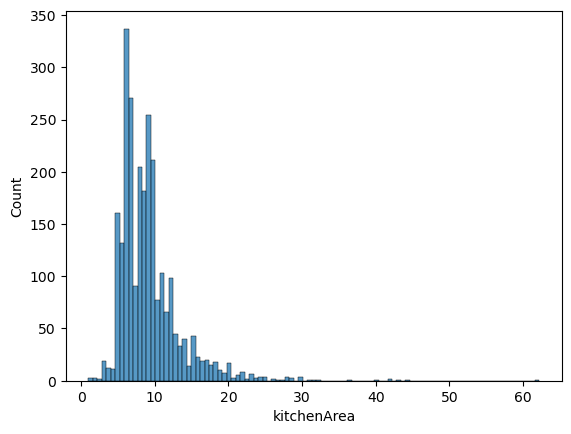

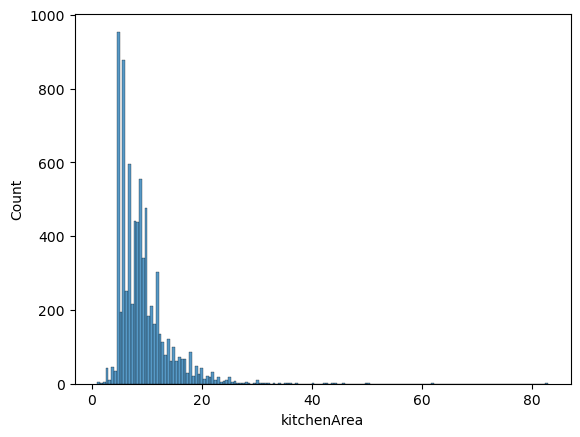

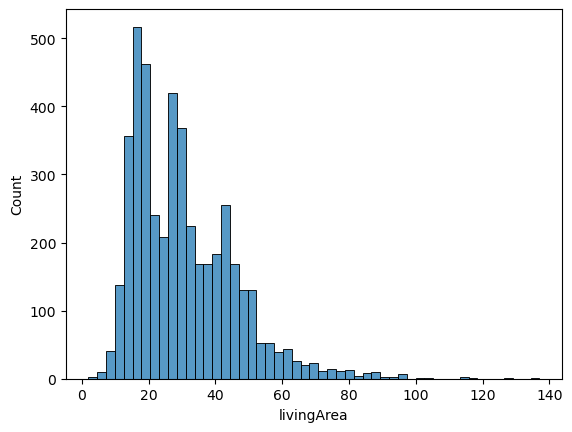

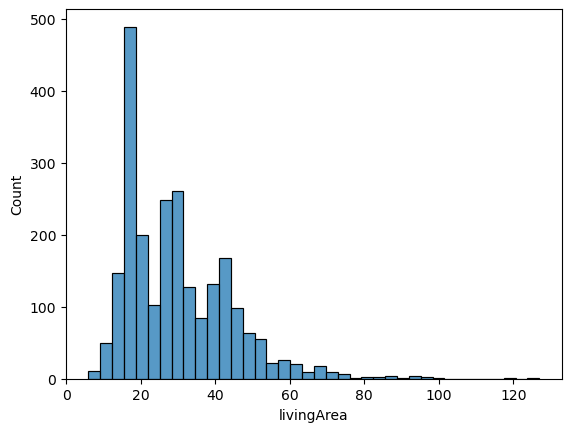

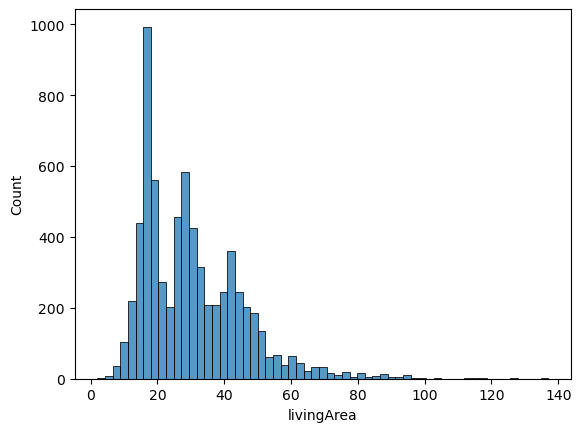

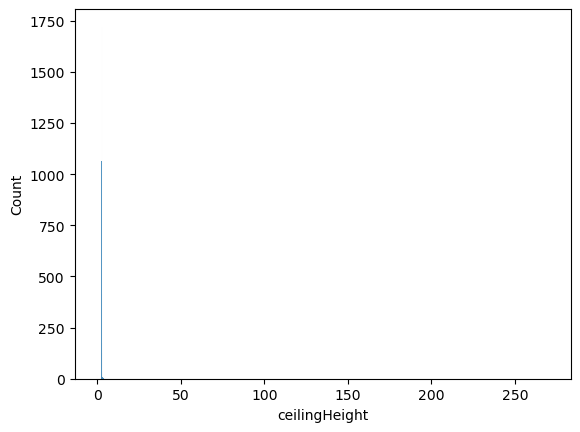

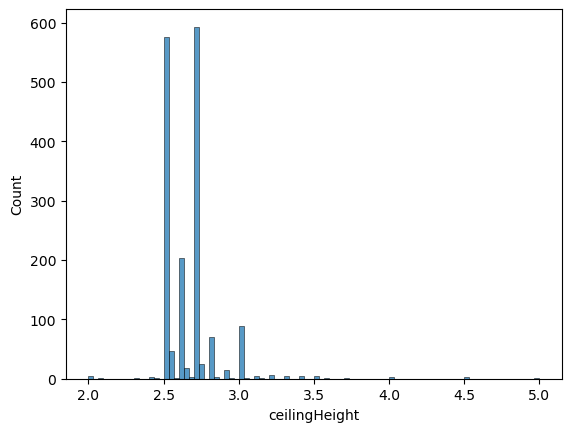

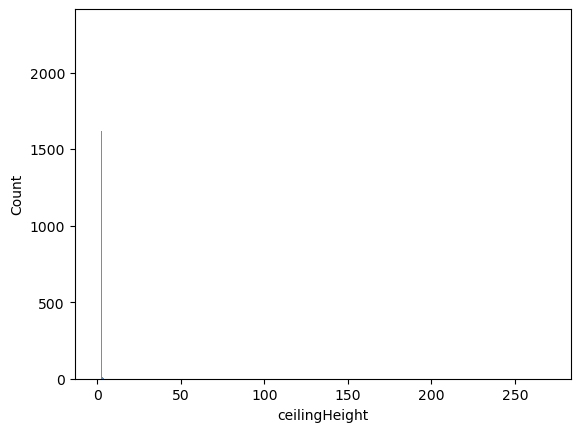

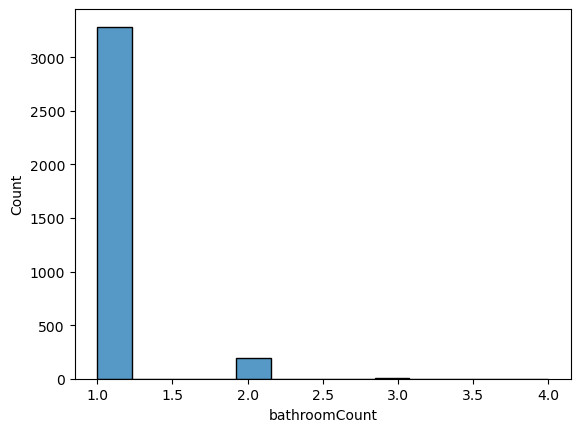

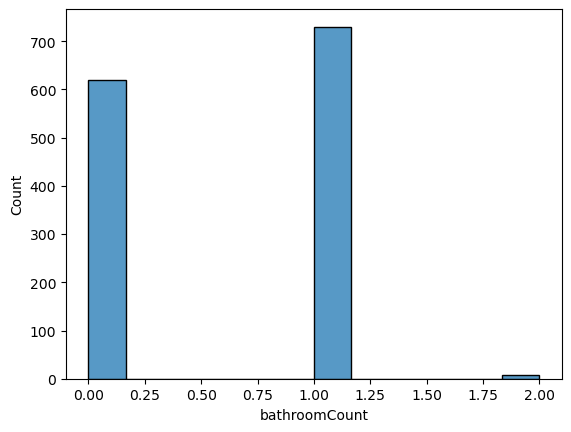

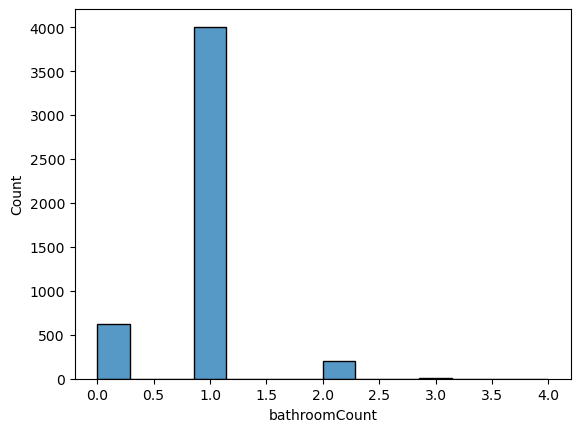

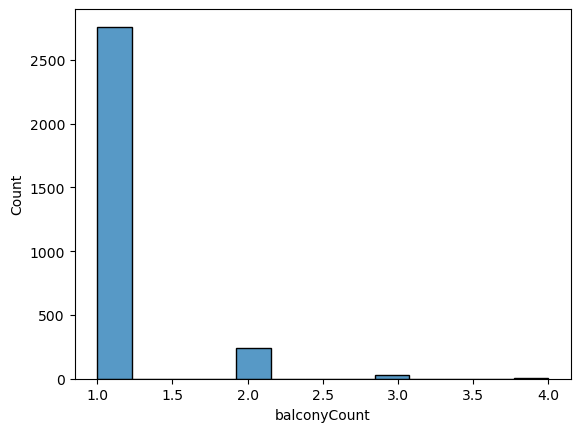

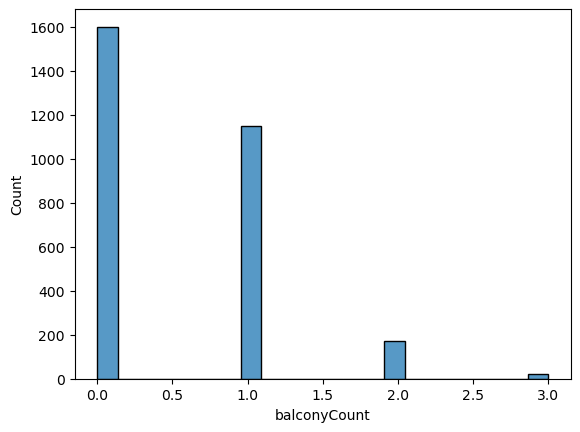

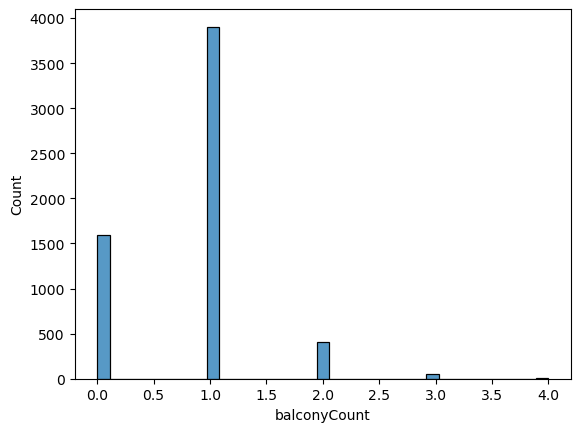

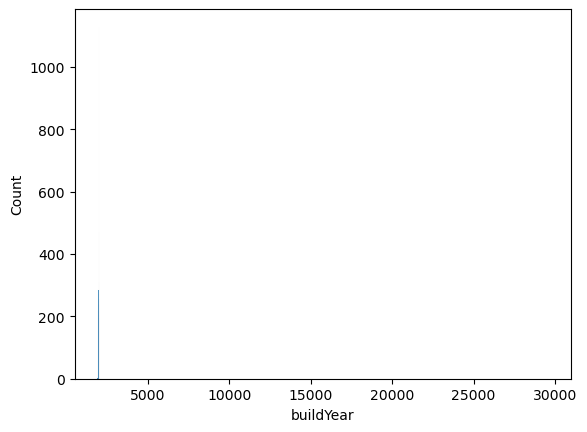

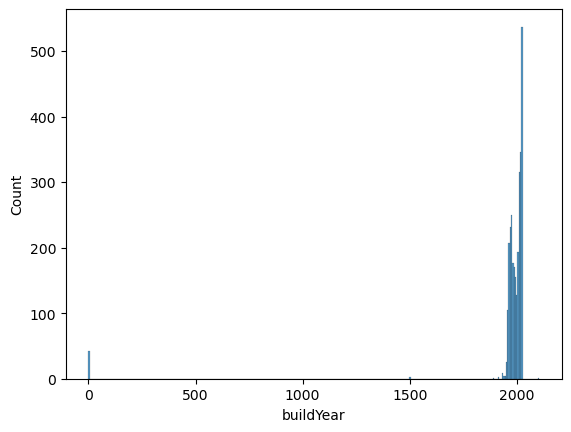

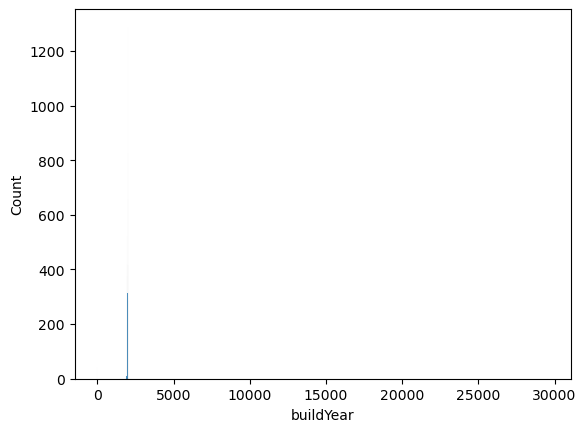

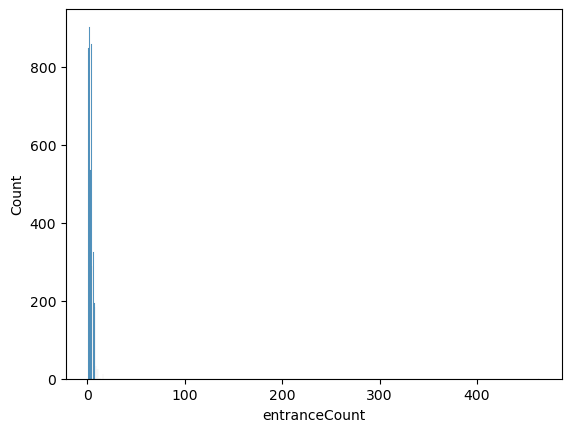

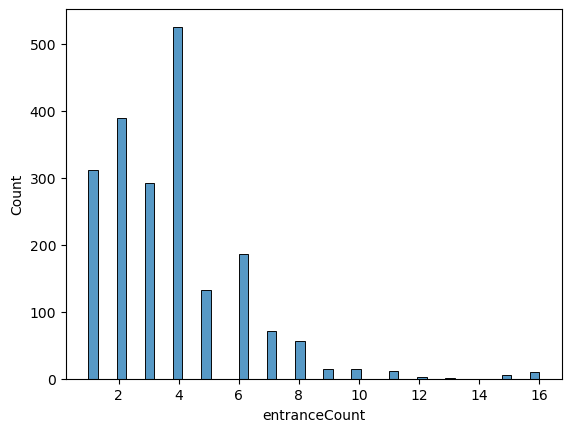

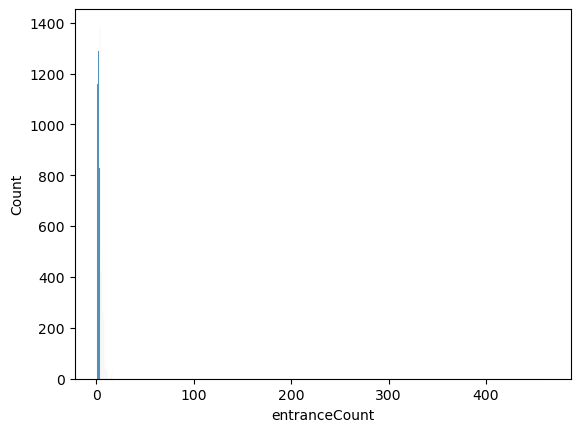

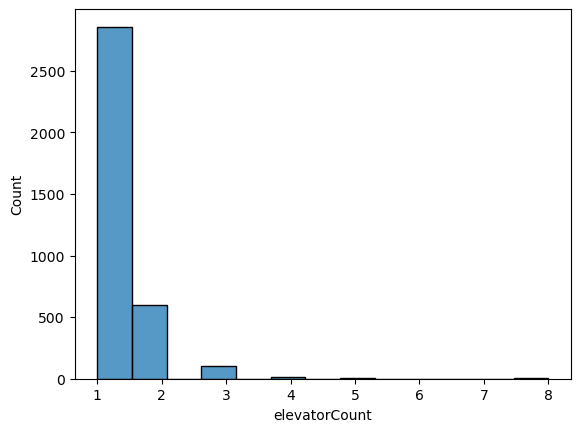

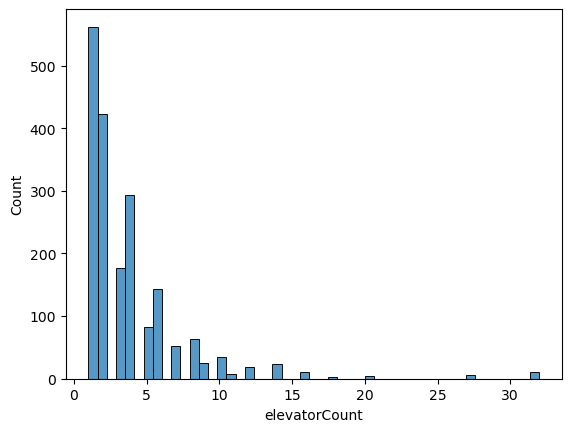

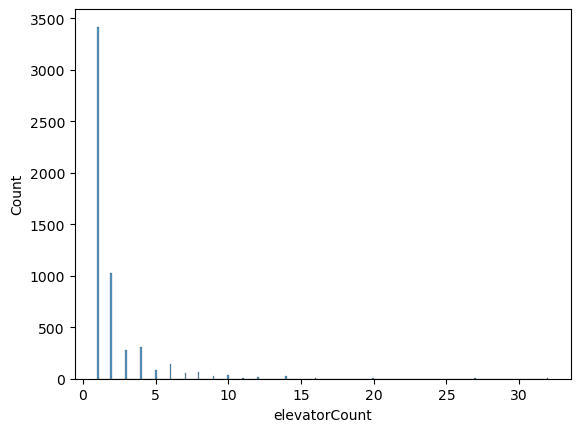

<Figure size 640x480 with 0 Axes>

In [202]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

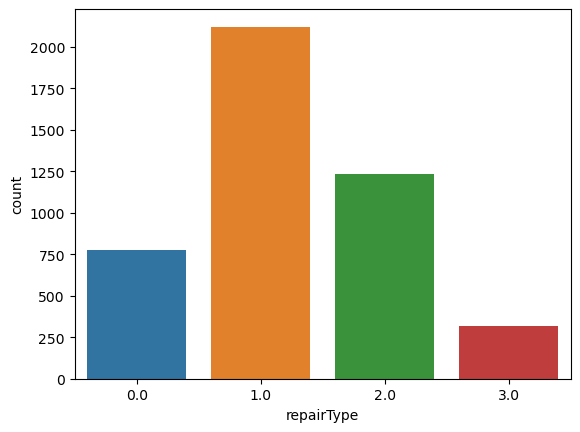

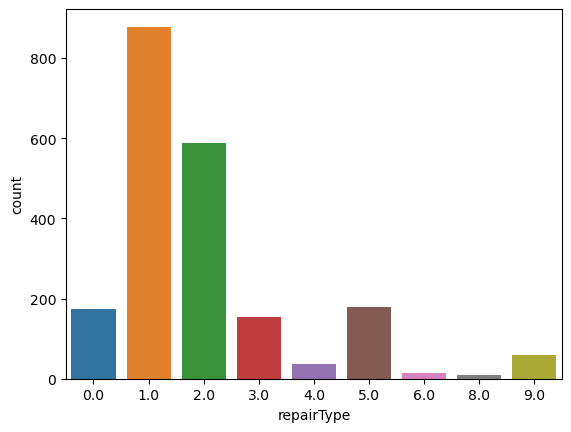

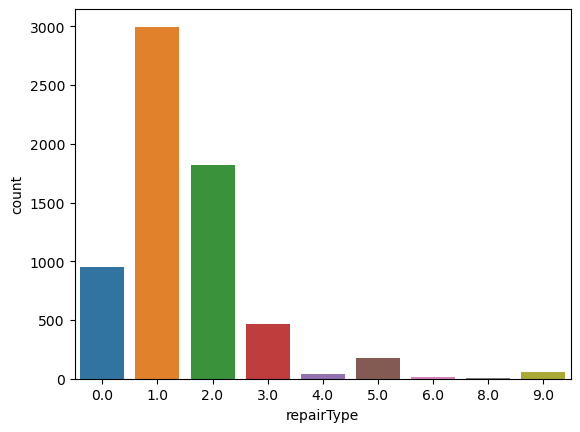

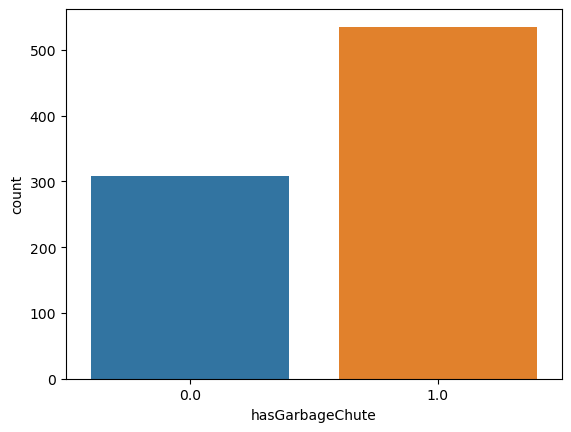

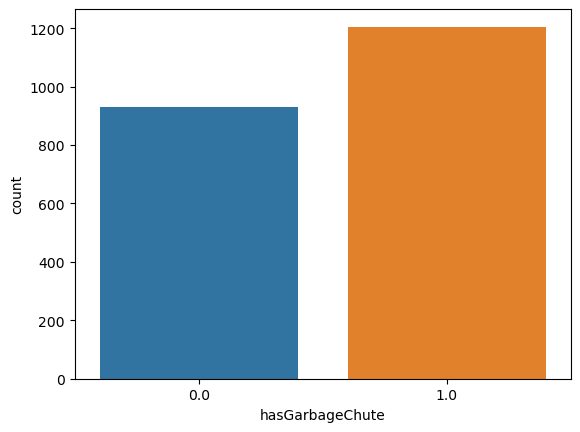

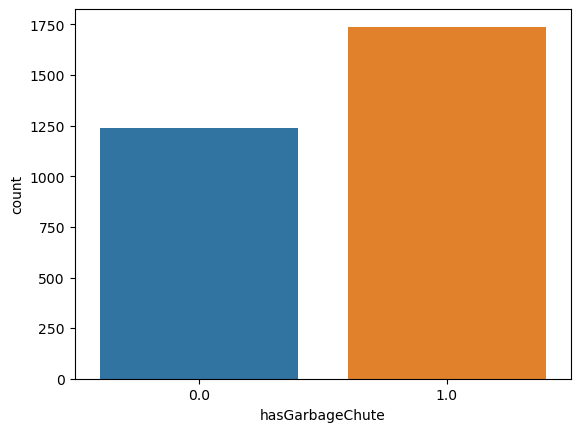

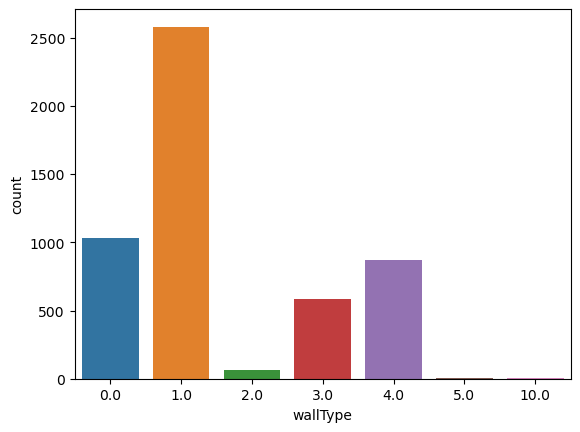

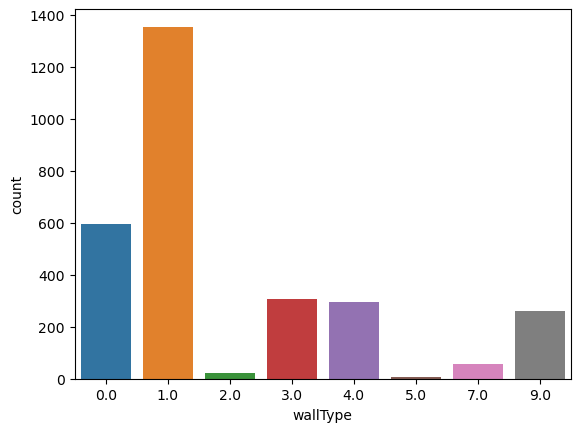

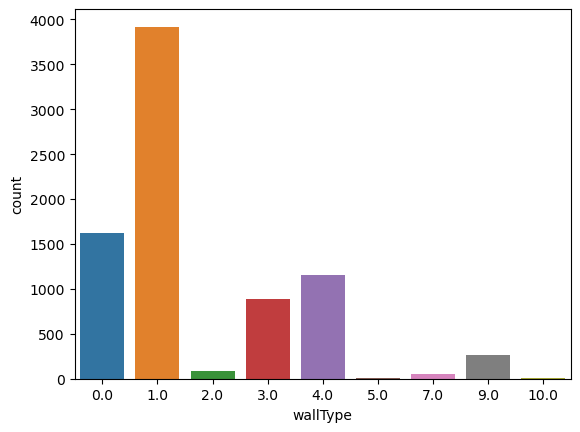

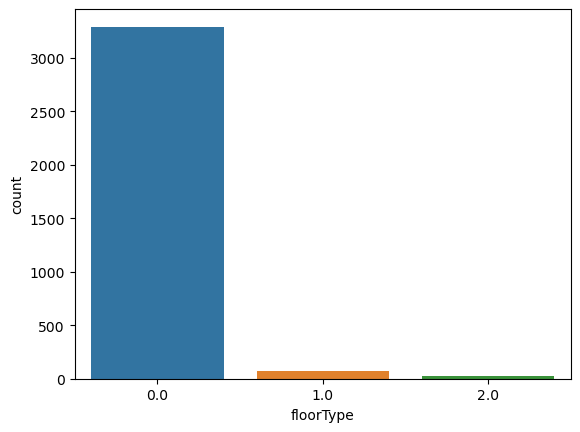

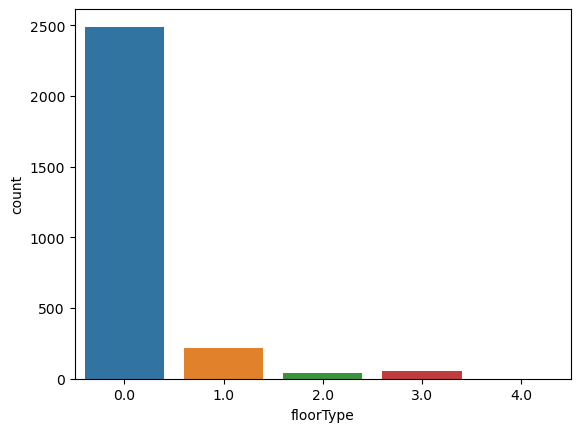

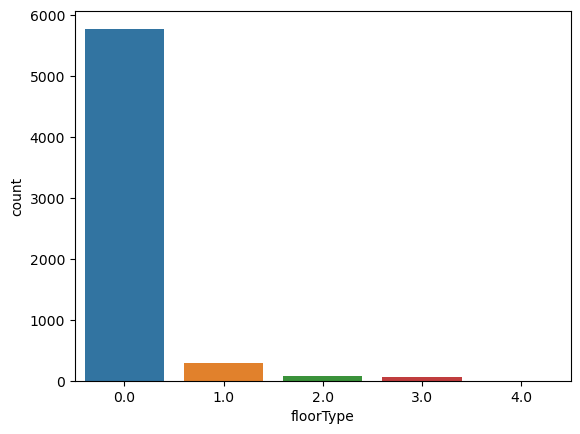

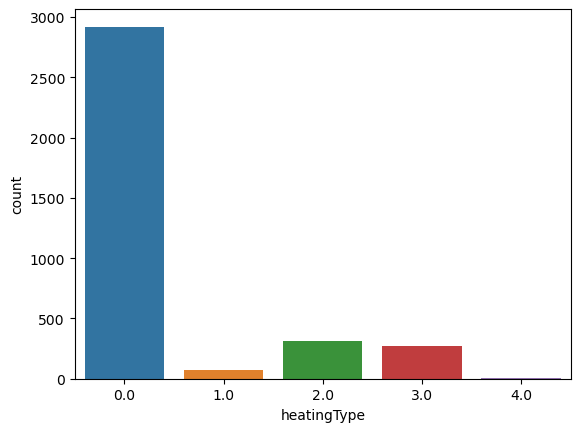

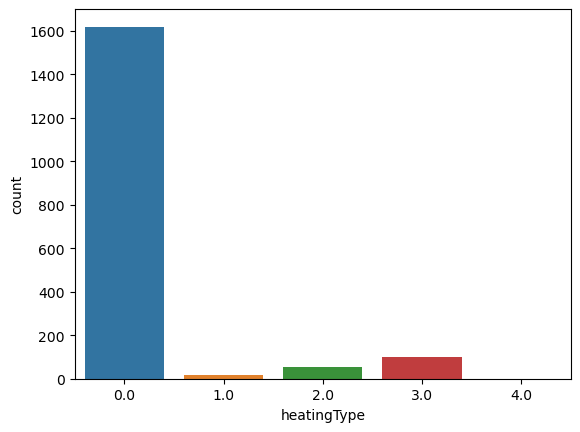

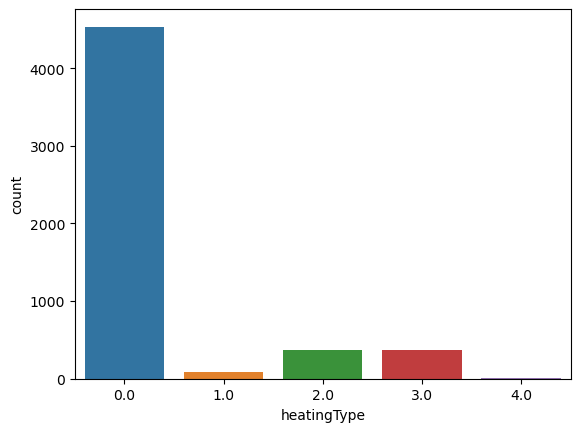

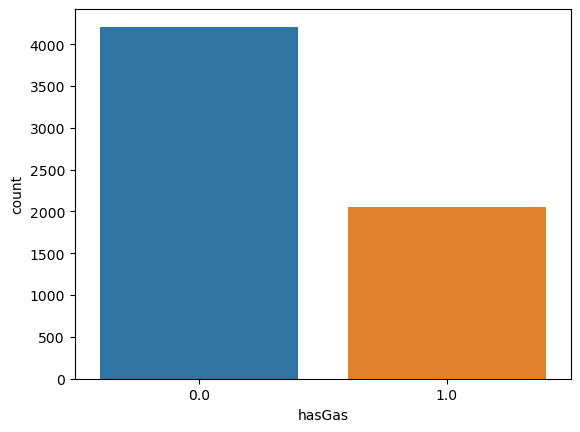

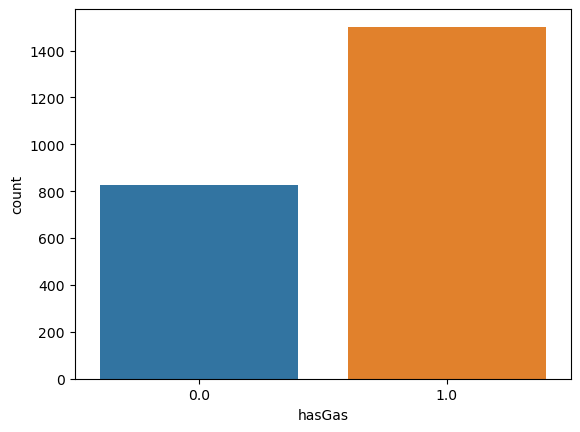

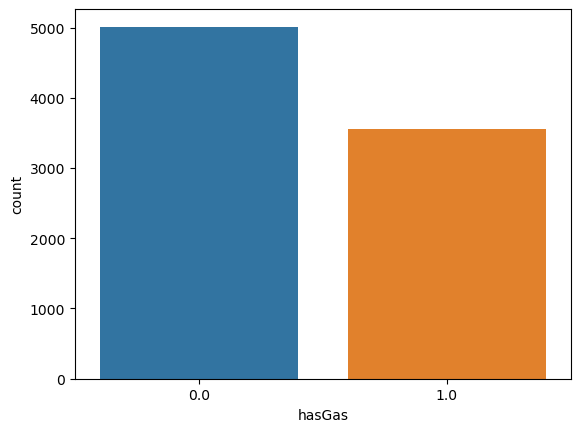

<Figure size 640x480 with 0 Axes>

In [203]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [204]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [205]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2940 non-null   float64
 1   longitude                      2940 non-null   float64
 2   price                          2940 non-null   int64  
 3   house_floors                   2940 non-null   int64  
 4   house_buildYear                2940 non-null   float64
 5   house_ceilingHeight            2940 non-null   float64
 6   house_hasGarbageDisposer       2940 non-null   float64
 7   house_liftsFreight             2940 non-null   float64
 8   house_liftsPassenger           2940 non-null   float64
 9   house_wallType                 2940 non-null   float64
 10  house_areaNonResidential       2940 non-null   float64
 11  house_basementArea             2940 non-null   float64
 12  house_chuteCount               2940 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,54.75131,56.00232,7800000,6,1993.00000,2.60000,0.00000,0.00000,0.00000,1.00000,0.00000,1213.00000,4.00000,1.00000,1.00000,1.00000,4.00000,11.00000,6.00000,1.00000,0.00000,3.00000,0.00000,80.00000,0.00000,1.00000,2.00000,3,64.70000,7.70000,39.10000,5,0.00000,1.00000,1,1.00000,3.00000
1,54.79448,56.03976,2000000,2,2023.00000,3.00000,0.00000,0.00000,0.00000,1.00000,2682.60000,9260.60000,2.00000,1.00000,12.00000,1.00000,1.00000,6.00000,2.00000,1.00000,1.00000,3.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1,17.30000,4.00000,13.30000,2,1.00000,1.00000,0,0.00000,6.00000
2,54.77827,56.03537,4199999,5,1961.00000,2.60000,0.00000,0.00000,0.00000,1.00000,172.50000,42.10000,2.00000,1.00000,1.00000,1.00000,2.00000,6.00000,3.00000,1.00000,0.00000,3.00000,0.00000,0.00000,0.00000,1.00000,2.00000,2,42.90000,6.00000,29.20000,4,1.00000,1.00000,1,1.00000,9.00000
3,54.79558,55.86950,6900000,14,2012.00000,2.70000,1.00000,0.00000,1.00000,1.00000,516.80000,689.00000,2.00000,1.00000,2.00000,1.00000,4.00000,11.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2,62.60000,11.60000,33.90000,3,1.00000,1.00000,0,0.00000,2.00000
4,54.76389,56.07152,6250000,9,1989.00000,2.60000,1.00000,0.00000,1.00000,0.00000,25.80000,3135.00000,9.00000,1.00000,2.00000,1.00000,9.00000,11.00000,9.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.00000,2,61.20000,8.00000,29.80000,2,1.00000,1.00000,0,1.00000,2.00000


In [206]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [207]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 11328
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6264 non-null   int64  
 1   price_for_metr       6264 non-null   int64  
 2   floor_object         6264 non-null   int64  
 3   total_floors         6264 non-null   int64  
 4   type_of_home         6264 non-null   float64
 5   square_home          6264 non-null   float64
 6   live_square          6264 non-null   float64
 7   kitchen_square       6264 non-null   float64
 8   height_ceiling       6264 non-null   float64
 9   bathroom             6264 non-null   float64
 10  balcony              6264 non-null   float64
 11  repair               6264 non-null   float64
 12  yer_home             6264 non-null   float64
 13  garbage_chute        6264 non-null   float64
 14  type_home            6264 non-null   float64
 15  type_of_overlap      6264 non-null   float

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1150000,92000,3,5,0.00000,12.50000,6.40000,3.00000,2.70000,1.00000,1.00000,1.00000,1976.00000,1.00000,1.00000,0.00000,2.00000,0.00000,1.00000,2.00000,1.00000,1
1,1250000,16892,2,4,0.00000,74.00000,35.80000,6.70000,3.00000,2.00000,1.00000,1.00000,1951.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,2.00000,1.00000,0
2,1280000,32821,1,2,0.00000,39.00000,25.00000,5.00000,2.50000,1.00000,1.00000,1.00000,1962.00000,0.00000,1.00000,1.00000,1.00000,2.00000,0.00000,2.00000,1.00000,1
3,1185000,91154,5,9,0.00000,13.00000,9.00000,3.30000,2.70000,1.00000,1.00000,1.00000,1972.00000,0.00000,1.00000,0.00000,2.00000,0.00000,0.00000,2.00000,1.00000,0
4,1200000,33333,1,2,0.00000,36.00000,17.00000,12.00000,2.70000,1.00000,1.00000,1.00000,1960.00000,0.00000,2.00000,1.00000,2.00000,0.00000,0.00000,0.00000,3.00000,1


In [208]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [209]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9179 non-null   int64  
 1   room_count       9179 non-null   int64  
 2   floor            9179 non-null   int64  
 3   totalFloors      9179 non-null   int64  
 4   area             9179 non-null   float64
 5   kitchenArea      9179 non-null   float64
 6   livingArea       9179 non-null   float64
 7   ceilingHeight    9179 non-null   float64
 8   bathroomCount    9179 non-null   float64
 9   balconyCount     9179 non-null   float64
 10  repairType       9179 non-null   float64
 11  buildYear        9179 non-null   float64
 12  hasGarbageChute  9179 non-null   float64
 13  wallType         9179 non-null   float64
 14  floorType        9179 non-null   float64
 15  entranceCount    9179 non-null   float64
 16  heatingType      9179 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,7800000,3,5,6,64.70000,7.70000,39.10000,2.60000,1.00000,1.00000,3.00000,1993.00000,0.00000,1.00000,0.00000,6.00000,0.00000,1.00000,2.00000
1,2000000,1,2,2,17.30000,4.00000,13.30000,3.00000,1.00000,0.00000,6.00000,2023.00000,1.00000,1.00000,1.00000,2.00000,1.00000,0.00000,1.00000
2,4199999,2,4,5,42.90000,6.00000,29.20000,2.60000,1.00000,1.00000,9.00000,1961.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,2.00000
3,6900000,2,3,14,62.60000,11.60000,33.90000,2.70000,1.00000,0.00000,2.00000,2012.00000,1.00000,1.00000,0.00000,2.00000,0.00000,0.00000,4.00000
4,6250000,2,2,9,61.20000,8.00000,29.80000,2.60000,1.00000,0.00000,2.00000,1989.00000,1.00000,0.00000,0.00000,9.00000,0.00000,1.00000,9.00000


In [210]:
combined_imputation['heatingType'].unique()

array([0., 1., 3., 2., 4.])

In [211]:
combined_imputation['repairType'].unique()

array([3., 6., 9., 2., 5., 1., 4., 0., 8.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [212]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [213]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [214]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [215]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3430770188721.76
MAE:  1082807.630435187
RMSE:  1852233.8374842848
R2:  0.7214527744789739


In [216]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  1788850889258.6936
MAE:  828083.9473253562
RMSE:  1337479.3042356556
R2:  0.8752050822073153


In [217]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  4338667633226.6665
MAE:  1372883.7553783674
RMSE:  2082946.862794792
R2:  0.6827845264466617


## Случайный лес

In [218]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  2677600782537.0645
MAE:  790262.0051972788
RMSE:  1636337.6126389885
R2:  0.7826032558285366


In [219]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  283800357101.74554
MAE:  114161.45736909323
RMSE:  532729.159237361
R2:  0.9802013446471641


In [220]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2683198653454.936
MAE:  989400.1233819899
RMSE:  1638047.207334067
R2:  0.8038217712333993


## Дерево решений

In [221]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  5342880969622.571
MAE:  1108547.2544217687
RMSE:  2311467.2763469033
R2:  0.5662068315534861


In [222]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  525461466884.3174
MAE:  205681.8601532567
RMSE:  724887.2097673661
R2:  0.9633424334265075


In [223]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5486918780409.013
MAE:  1259164.933769063
RMSE:  2342417.2942516054
R2:  0.598831787448601


## Метод k-ближайших соседей

In [224]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  9915608139033.59
MAE:  1870603.1507482997
RMSE:  3148905.8637935794
R2:  0.19494312222919064


In [225]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  9380951686481.916
MAE:  1994851.4970625795
RMSE:  3062833.9306077166
R2:  0.3455602691307613


In [226]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  4039170436701.5933
MAE:  1175805.4029629629
RMSE:  2009768.752046263
R2:  0.7046818352647015


## Перцептрон

In [227]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  25260350194086.41
MAE:  3602183.640166204
RMSE:  5025967.587846783
R2:  -1.050909875975644


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [228]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  10686588123809.246
MAE:  2270980.536370191
RMSE:  3269034.7388501773
R2:  0.25447565562733


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [229]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  14950605523952.26
MAE:  2394198.161194786
RMSE:  3866601.288464103
R2:  -0.09309212230728736


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [230]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  2736188133678.4907
MAE:  787056.9159863945
RMSE:  1654142.718654739
R2:  0.7778464976624787


In [231]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  207818366277.36606
MAE:  153019.39758939974
RMSE:  455870.99740756274
R2:  0.9855020471012308


In [232]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2661388232676.0176
MAE:  1000254.8369281046
RMSE:  1631376.1775495
R2:  0.8054164089288055


# Сохранить модель

In [233]:
combined_imputation.to_csv('datasets_18features/combined_ufa_18feature.csv', index=False)

In [234]:
import pickle

rf_pkl_file = "models_18features/rf_model_ufa_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_ufa_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [235]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [236]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2664162433626.278
MAE:  981879.0185879759
RMSE:  1632226.220113584
R2:  0.8052135771973703


In [237]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2728746878069.3076
MAE:  1007460.5832244009
RMSE:  1651891.9087123428
R2:  0.8004915779893004


In [238]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_ufa_10feature.csv', index=False)

In [239]:
rf_pkl_file = "models_10features/rf_model_ufa_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_ufa_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [240]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                9179 non-null   int64  
 1   room_count           9179 non-null   int64  
 2   floor                9179 non-null   int64  
 3   totalFloors          9179 non-null   int64  
 4   area                 9179 non-null   float64
 5   kitchenArea          9179 non-null   float64
 6   livingArea           9179 non-null   float64
 7   ceilingHeight        9179 non-null   float64
 8   bathroomCount        9179 non-null   float64
 9   balconyCount         9179 non-null   float64
 10  buildYear            9179 non-null   float64
 11  entranceCount        9179 non-null   float64
 12  elevatorCount        9179 non-null   float64
 13  repairType_0.0       9179 non-null   bool   
 14  repairType_1.0       9179 non-null   bool   
 15  repairType_2.0       9179 non-null   b

In [241]:
combined_ohe.to_csv('datasets_18features_ohe/combined_ufa_18feature_ohe.csv', index=False)

In [242]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [243]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2482723575755.495
MAE:  962289.3681125636
RMSE:  1575666.0736829664
R2:  0.8184792195756166


In [244]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2781532037370.8403
MAE:  1002487.1538671023
RMSE:  1667792.5642509742
R2:  0.7966322666246335


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
                   
model.fit(X_train_combined, y_train_combined)

In [245]:
rf_pkl_file = "models_18features_ohe/rf_model_ufa_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_ufa_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [246]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_ufa_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9179 non-null   int64  
 1   room_count       9179 non-null   int64  
 2   floor            9179 non-null   int64  
 3   totalFloors      9179 non-null   int64  
 4   area             9179 non-null   float64
 5   kitchenArea      9179 non-null   float64
 6   livingArea       9179 non-null   float64
 7   ceilingHeight    9179 non-null   float64
 8   buildYear        9179 non-null   float64
 9   repairType_0.0   9179 non-null   bool   
 10  repairType_1.0   9179 non-null   bool   
 11  repairType_2.0   9179 non-null   bool   
 12  repairType_3.0   9179 non-null   bool   
 13  repairType_4.0   9179 non-null   bool   
 14  repairType_5.0   9179 non-null   bool   
 15  repairType_6.0   9179 non-null   bool   
 16  repairType_8.0   9179 non-null   bool   
 17  repairType_9.0

In [247]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [248]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2482492268490.507
MAE:  965160.4053715843
RMSE:  1575592.672136586
R2:  0.8184961312751987


In [249]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2641849564399.5327
MAE:  1005097.7288671024
RMSE:  1625376.7453730635
R2:  0.8068449506918253


In [250]:
rf_pkl_file = "models_10features_ohe/rf_model_ufa_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_ufa_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)